# IMDB Report

## 1. Introduction

What makes a movie become a successful blockbuster? Why are there certain movies immediately being in the public's eyes? How is a successul movie supposed to be? Those questions have not only been the common interests of the movie enthusiasts but also the interesting research area for data scientists/analysts in recent years. Considering the widely-used movie grading systems, IMDB seems to be the most prevelant one among critics as well as public viewers. In this report, the IDBMD dataset from the Kaggle community is employed to provide more profound insights into different aspects of the successful movies. Particularly, using Python and relevant libraries/packages for data analytics and visualisation, this report will try to find answers for following questions: 

- During the period of 1916-2016, who were the most successful directors and actors with respect to the gross earnings of the movies? 
- With regards to some common evaluation criteria including IMBD scores, Gross earnings & Movie Facebook Like, how good is a particular movie in comparison with other movies on average? Accordingly, comparison between any of two particular movies will be evaluated.
- How had the distribution of the gross earnings been changed over time? 
- Were there any variance within ditributions of different movies genres with respect to the IMDB scores? 
- Were there any correlation/relationship between the IMDB scores with other variables in the given dataset?


To address such questions above, the report will be constructed as follows **2. Data Pre-processing**, **3. Directors/Actors vs. Gross Earnings**, **4. Movies Comparisons**, **5. Distribution of the Gross Earnings**, **6. Genres Analysis**, **7. IMDB scores vs. Other Variables**

## 2. Data Pre-processing 

First of all, relevant libraries/packages are imported so that the data analytics process could be carried out in the following steps. NB: the package `missingno` is to visualise the the missing values in the dataset. For more information, please follow the [link](https://anaconda.org/conda-forge/missingno). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

### 2.1 Data Overview
The dataset `movie_metadata.csv` is imported as the pandas dataframe `df`. Regarding the data's variables and their desciptions, in short, there are 28 variables together with 5043 observations. Accordingly, the detailed summary of the dataframe `df`: the variables' descriptions, number of the non-null values and datatype for each of the variable are listed below. 

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
# dimension of the origninal dataframe
df.shape

(5043, 28)

<table>
  <thead>
    <tr>
      <th>No</th>
      <th>Variable</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>movie_title</td>
      <td>Title of the Movie</td>
    </tr>
    <tr>
      <td>2</td>
      <td>duration</td>
      <td>Duration in minutes</td>
    </tr>
    <tr>
      <td>3</td>
      <td>director_name</td>
      <td>Name of the Director of the Movie</td>
    </tr>
    <tr>
      <td>4</td>
      <td>director_facebook_likes</td>
      <td>Number of likes of the Director on his Facebook Page</td>
    </tr>
    <tr>
      <td>5</td>
      <td>actor_1_name</td>
      <td>Primary actor starring in the movie</td>
    </tr>
    <tr>
      <td>6</td>
      <td>actor_1_facebook_likes</td>
      <td>Number of likes of the Actor_1 on his/her Facebook Page</td>
    </tr>
    <tr>
      <td>7</td>
      <td>actor_2_name</td>
      <td>Other actor starring in the movie</td>
    </tr>
    <tr>
      <td>8</td>
      <td>actor_2_facebook_likes</td>
      <td>Number of likes of the Actor_2 on his/her Facebook Page</td>
    </tr>
    <tr>
      <td>9</td>
      <td>actor_3_name</td>
      <td>Other actor starring in the movie</td>
    </tr>
    <tr>
      <td>10</td>
      <td>actor_3_facebook_likes</td>
      <td>Number of likes of the Actor_3 on his/her Facebook Page</td>
    </tr>
    <tr>
      <td>11</td>
      <td>num_user_for_reviews</td>
      <td>Number of users who gave a review</td>
    </tr>
    <tr>
      <td>12</td>
      <td>num_critic_for_reviews</td>
      <td>Number of critical reviews on imdb</td>
    </tr>
    <tr>
      <td>13</td>
      <td>num_voted_users</td>
      <td>Number of people who voted for the movie</td>
    </tr>
    <tr>
      <td>14</td>
      <td>cast_total_facebook_likes	</td>
      <td>Total number of facebook likes of the entire cast of the movie</td>
    </tr>
    <tr>
      <td>15</td>
      <td>movie_facebook_likes</td>
      <td>Number of Facebook likes in the movie page</td>
    </tr>
    <tr>
      <td>16</td>
      <td>plot_keywords</td>
      <td>Keywords describing the movie plot</td>
    </tr>
    <tr>
      <td>17</td>
      <td>facenumber_in_poster</td>
      <td>Number of the actor who featured in the movie poster</td>
    </tr>
    <tr>
      <td>18</td>
      <td>color</td>
      <td>Film colorization. ‘Black and White’ or ‘Color’</td>
    </tr>
    <tr>
      <td>19</td>
      <td>genres</td>
      <td>Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’</td>
    </tr>
    <tr>
      <td>20</td>
      <td>title_year</td>
      <td>The year in which the movie is released (1916:2016)</td>
    </tr>
    <tr>
      <td>21</td>
      <td>language</td>
      <td>English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc</td>
    </tr>
    <tr>
      <td>22</td>
      <td>country</td>
      <td>Country where the movie is produced</td>
    </tr>
    <tr>
      <td>23</td>
      <td>content_rating</td>
      <td>Content rating of the movie</td>
    </tr>
    <tr>
      <td>24</td>
      <td>aspect_ratio</td>
      <td>Aspect ratio the movie was made in</td>
    </tr>
    <tr>
      <td>25</td>
      <td>movie_imdb_link</td>
      <td>IMDB link of the movie</td>
    </tr>
    <tr>
      <td>26</td>
      <td>gross</td>
      <td>Gross earnings of the movie in Dollars</td>
    </tr>
    <tr>
      <td>27</td>
      <td>budget</td>
      <td>Budget of the movie in Dollars</td>
    </tr>
    <tr>
      <td>28</td>
      <td>imdb_score</td>
      <td>IMDB Score of the movie on IMDB</td>
    </tr>
  </tbody>
</table>




In [4]:
# detailed info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### 2.2 Dropping unwanted columns
For the purpose of the analysis, non-relevant columns, i.e. `movie_imdb_link` & `plot_keywords`, are dropped.

In [5]:
df = df.drop(['movie_imdb_link', 'plot_keywords'], axis=1);

In [6]:
# dimension of the dataframe after dropping the unwanted columns
df.shape

(5043, 26)

### 2.3 Duplicated values
From the dataframe `df`, there are 45 duplicated observations. Therefore, dropping those observations is conducted to avoid errors in the following calculations and aggregations. 

In [7]:
# counting the number of duplicated rows 
df.duplicated().value_counts()

False    4998
True       45
dtype: int64

In [8]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [9]:
# dimension of the dataframe after dropping the duplicates
df.shape

(4998, 26)

### 2.4 Missing values
The missing values are counted and visualised below. 
<br>
Observations having missing values are then dropped. 

In [10]:
# number of missing values in each column
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

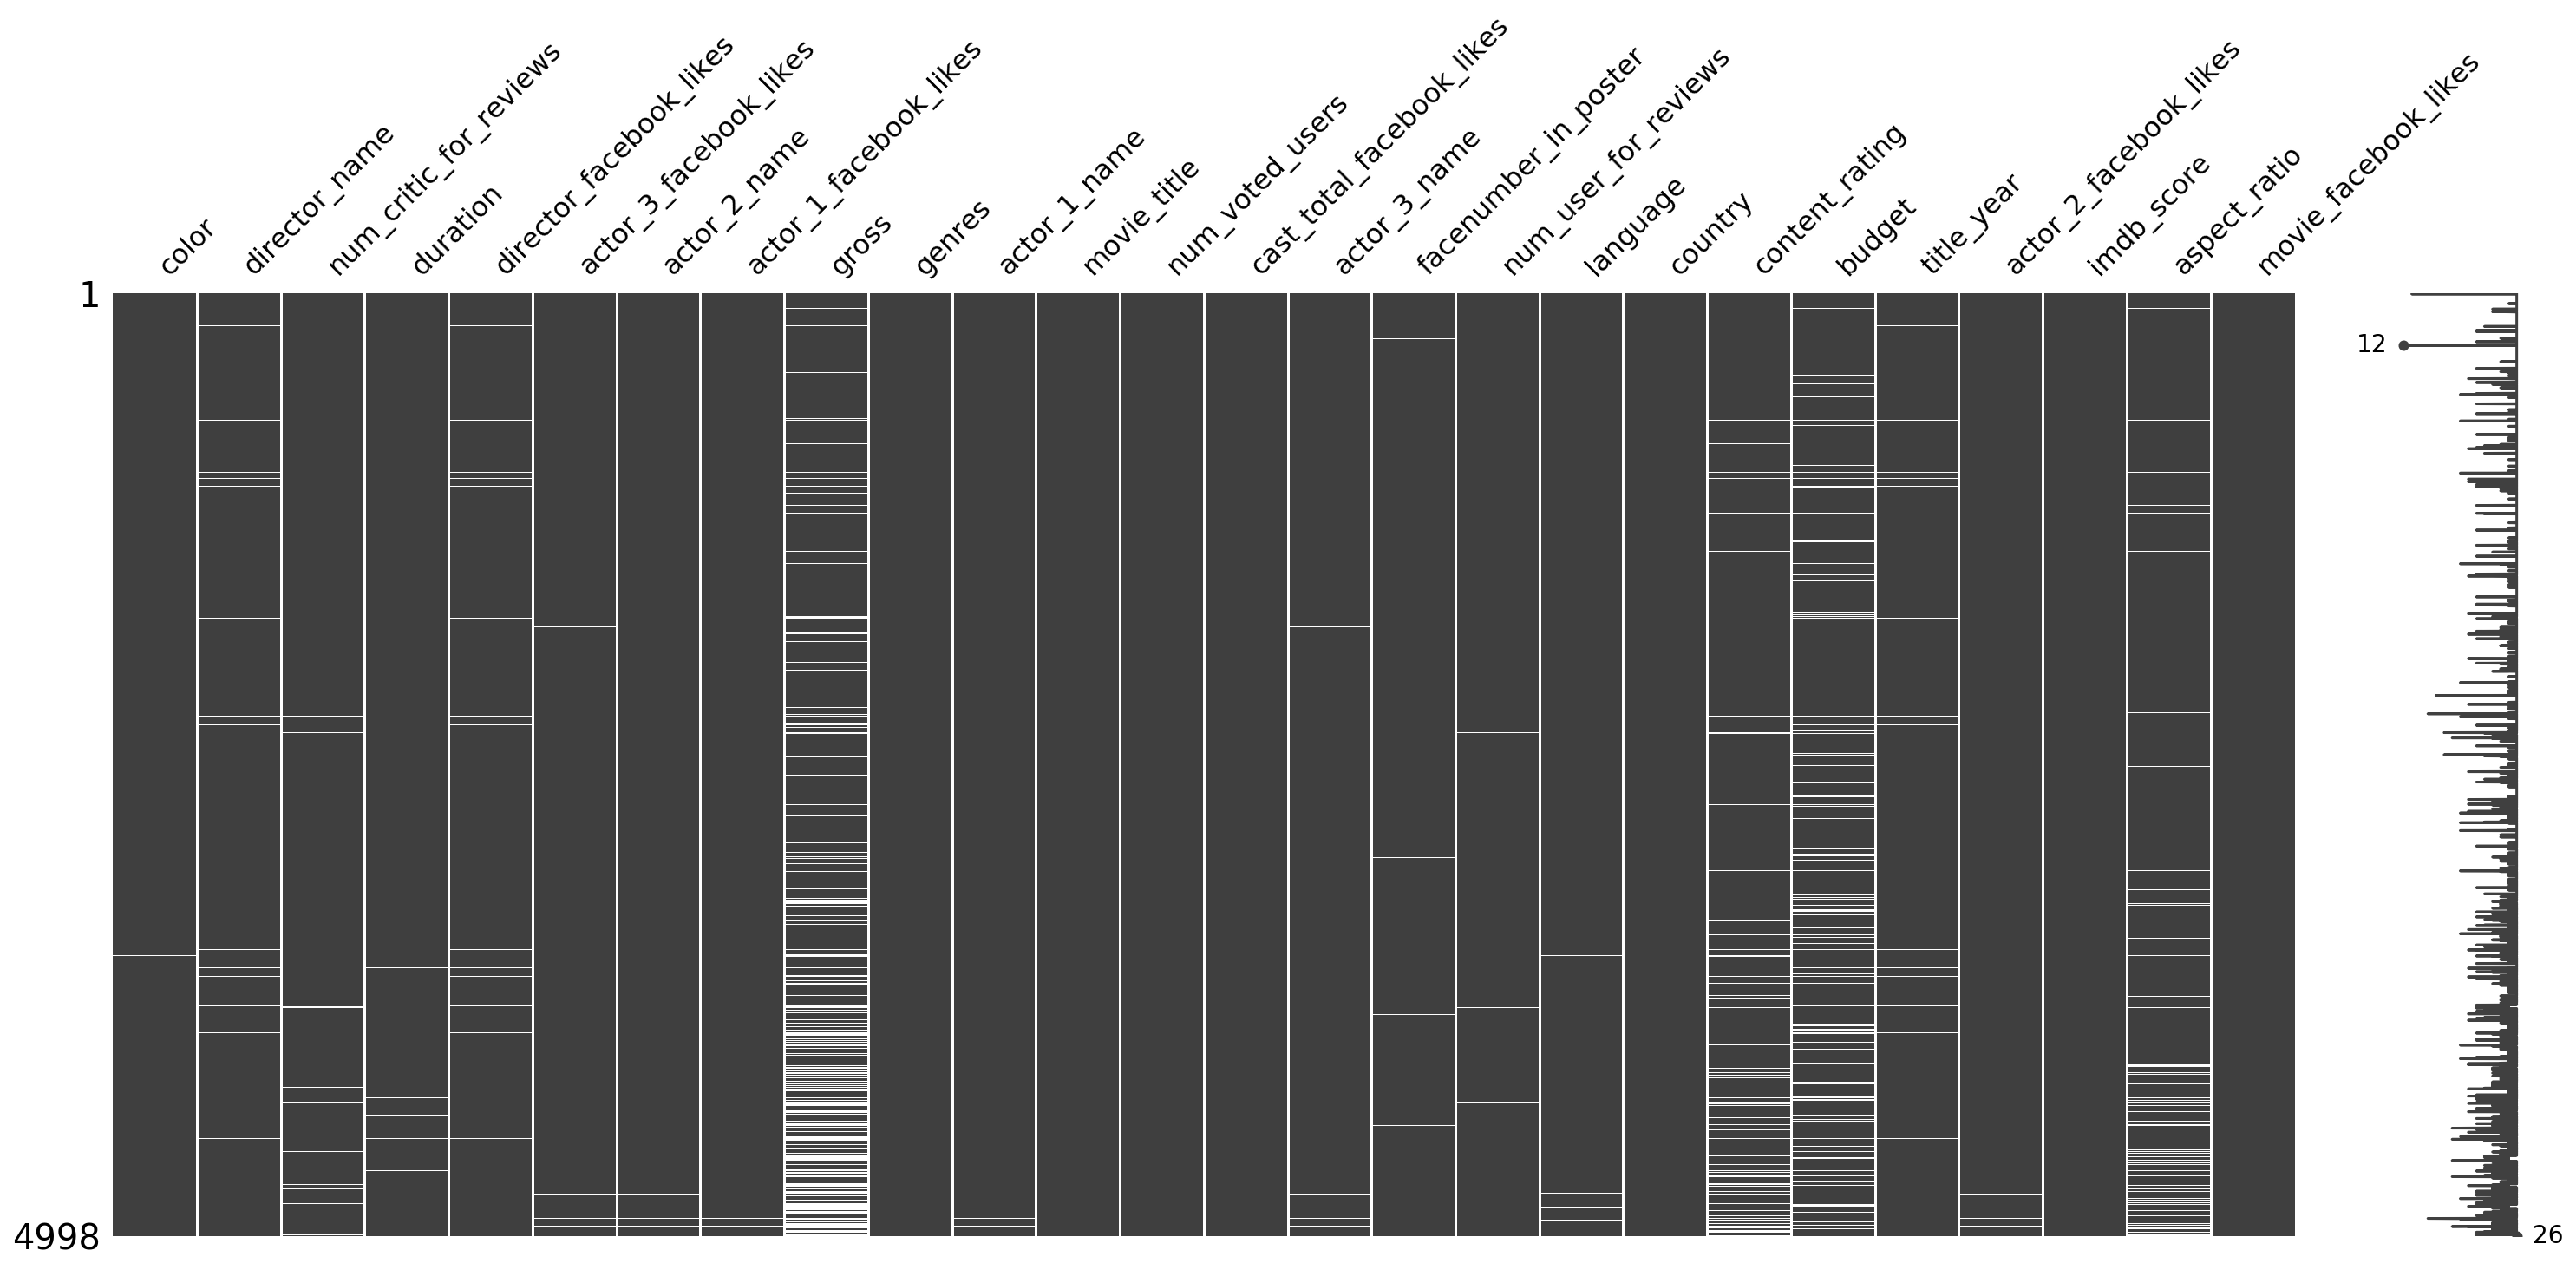

In [11]:
# the distribution of the missing values in the dataframe df
msno.matrix(df);

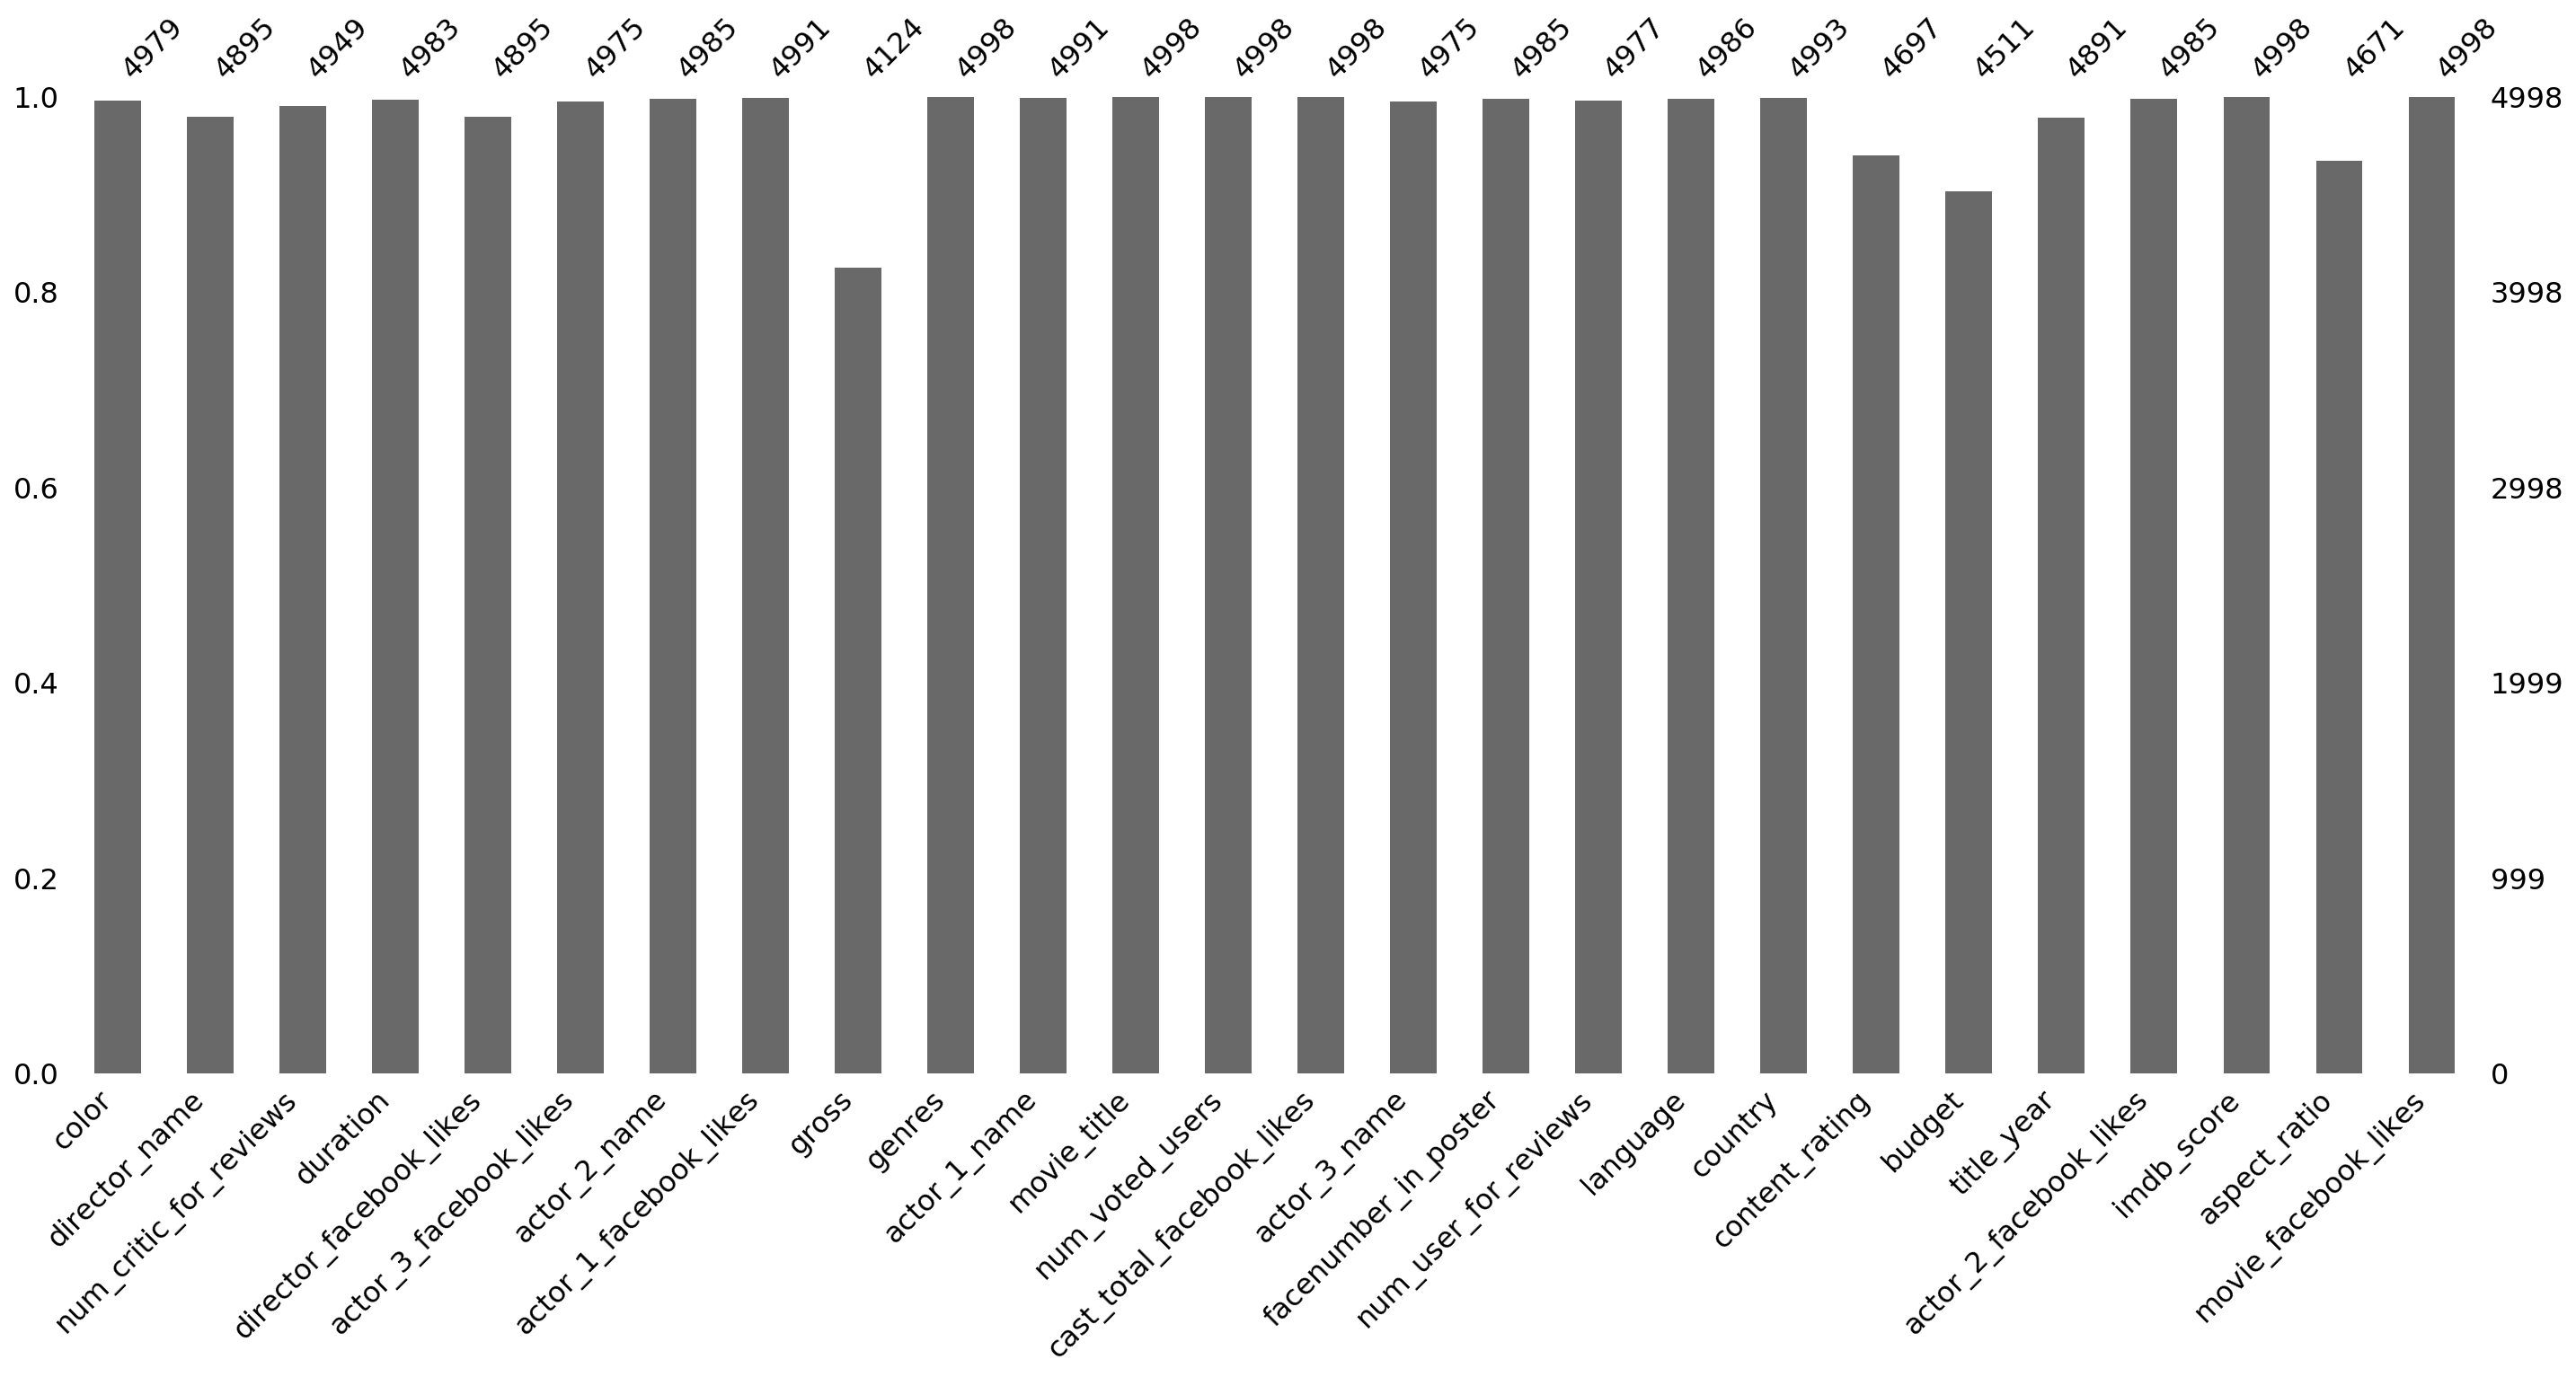

In [12]:
# barplot of the missing values in the dataframe df
msno.bar(df);

In [13]:
# dropping the missing values
df.dropna(inplace=True)

In [14]:
# dimension of the dataframe after dropping the missing values
df.shape

(3737, 26)

### 2.5 Other issues
All values in the `movie_title` have characters **'\xa0'** at the end. Thus, removing all **\xa0** characters in the colum `movie_title` is needed

In [15]:
df['movie_title'] = df['movie_title'].str.replace('\xa0','')

## 3. Directors/Actors vs. Gross Earnings
### 3.1. Directors vs. Gross Earnings
#### 3.1.1. Top most successful directors 
From the dataframe `df`, there are 1669 unique names of the directors. In order to calculate sum of the gross earnings for indivudual directors, the function `groupby` is used to sum up the gross earnings for each director. After that, the top 30 most successful directors are visualised. Besides, the distribution of the gross earnings are then investigated to provide a bigger picture of how the discrepancy regarding the *'success'* of individual directors is shaped in the movie industry. 

In [16]:
# number of unique directors
df['director_name'].nunique()

1669

In [17]:
# creating a pandas series storing sum of the gross earnings for each director in the descending order
director = (df.groupby('director_name').sum()['gross']/1e9).sort_values(ascending = False)

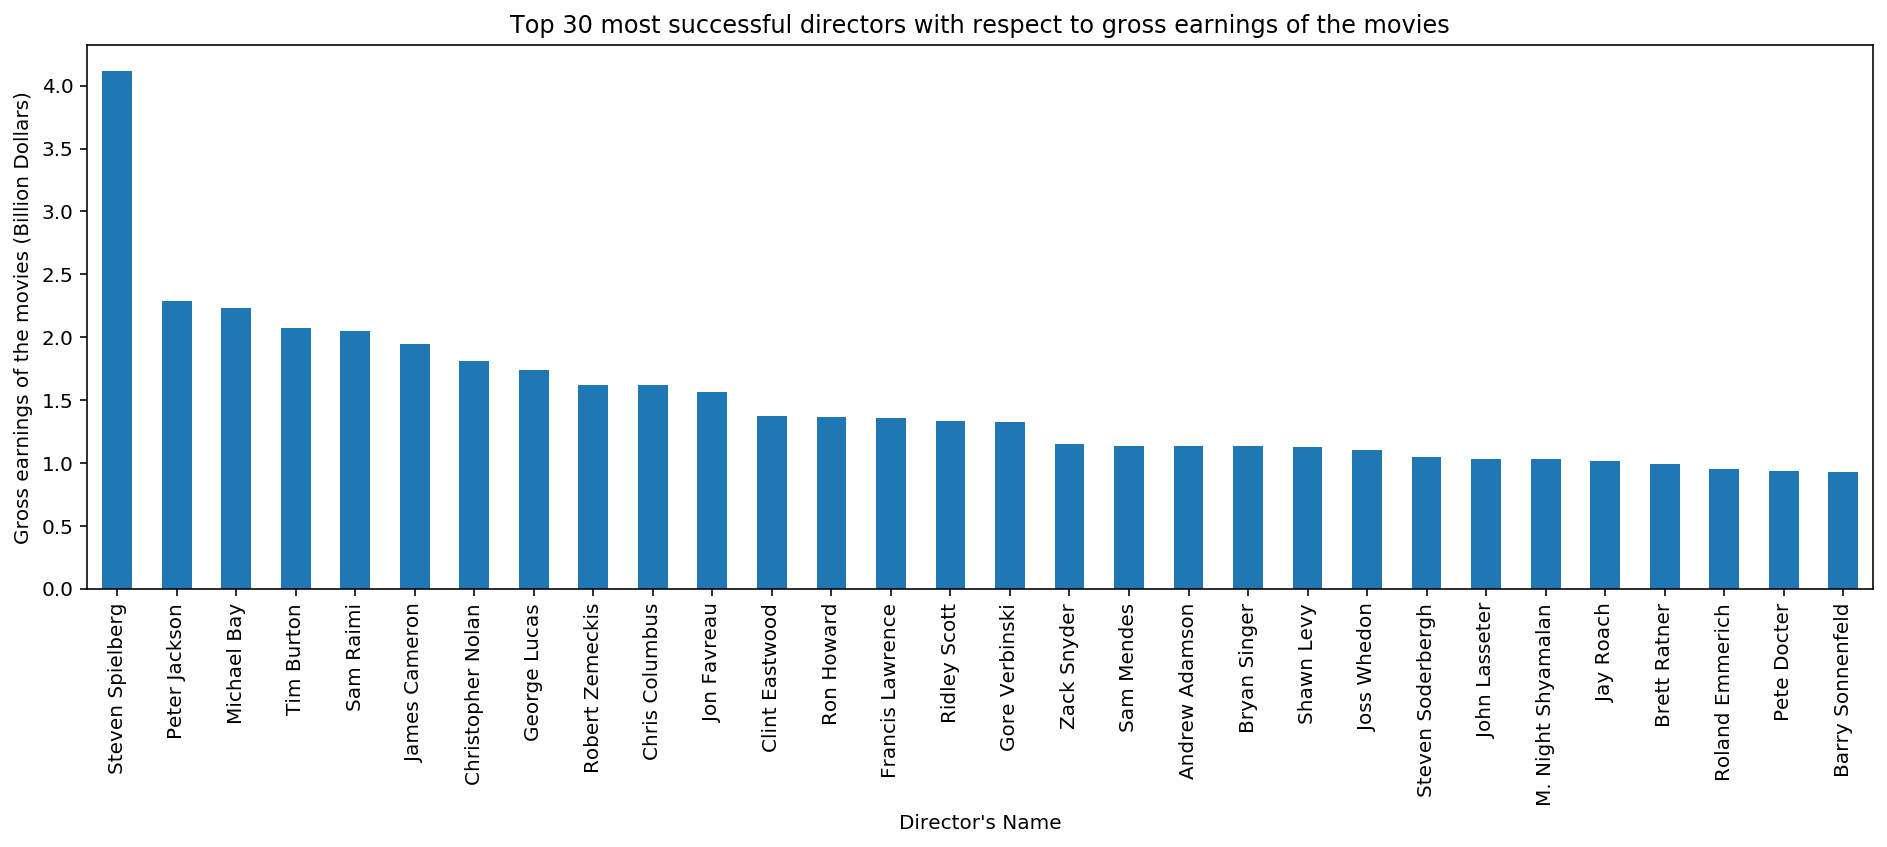

In [18]:
# visualising the top 30 most successful directors
plot1 = director[:30].plot.bar(rot=90, title='Top 30 most successful directors with respect to gross earnings of the movies', figsize = (16, 5))
plot1.set_xlabel("Director's Name")
plot1.set_ylabel("Gross earnings of the movies (Billion Dollars)");

#### 3.1.2. Lorez Curve: Wealth Imbalance among directors
The Lorenz curve is a graphical representation of the distribution of income or of wealth. Besides that, closely associated with the Lorez Curve, the Gini coefficient is the ratio of the area between the line of perfect equality and the observed Lorenz curve to the area between the line of perfect equality and the line of perfect inequality. The higher the coefficient, the more unequal the distribution is. To be more specific, the range of the Gini coefficient is from 0 (perfect equality) to 1 (perfect inequality). Those two concepts are used to visualise and quantify the gross eanrings distribution among directors. 

In [19]:
DIR = np.array(director)
DIR_lorenz = DIR.cumsum() / DIR.sum()
DIR_lorenz = np.insert(DIR_lorenz, 0, 0)

In [20]:
# establishing function calculating Gini coefficient
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [21]:
# calculating the gini coefficient of the gross earnings distribution of the directors
gini(DIR)

0.746164275702152

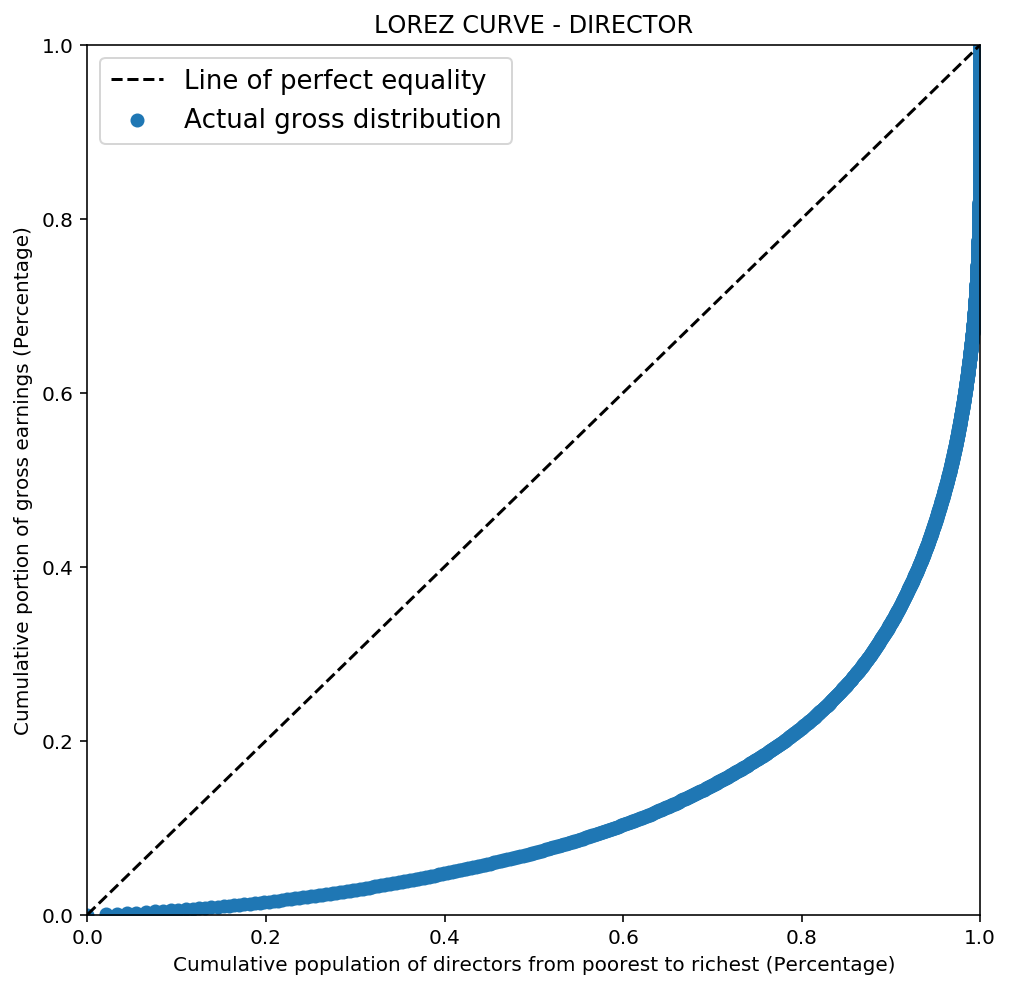

In [22]:
# setting the size of the plot
plt.figure(figsize=(8,8))
# plotting the gini curve
plt.scatter(DIR_lorenz,np.arange(DIR_lorenz.size)/(DIR_lorenz.size-1))
# setting the limits of x-axis and y-axis
plt.xlim([0,1])
plt.ylim([0,1])
# plotting the diagonal line of equality 
plt.plot([0,1], [0,1], color = 'k', linestyle='dashed')
# adding annotations
plt.xlabel('Cumulative population of directors from poorest to richest (Percentage)')
plt.ylabel('Cumulative portion of gross earnings (Percentage)')
plt.title('LOREZ CURVE - DIRECTOR')
plt.legend(['Line of perfect equality', 
            'Actual gross distribution'],
           loc="upper left",
           prop={"size":13})
# plotting the plot
plt.show();

**Conclusion**: the graphical representation together with the gini coefficient of 0.746 for the gross earnings distribution among directors indicate that there is a fairly huge gap between the top successful directors with the least successful ones. In another word, the minority of the most successful directors has accumlated a large proportion of wealth (gross earnings). Meanwhile, the majority of the least successful directors have their wealth which is obviously outweighed by the minority mentioned earlier. It might reflect one reality that the movie industry could somehow be harsh and higly selective for directors when it comes to success.

### 3.2. Actors vs. Gross Earnings 
#### 3.2.1. Top most successful actors
From the dataframe `df`, there are three columns `actor_1_name`, `actor_2_name` & `actor_3_name`. In order to calculate sum of the gross earnings of the movies for indivudual actors, there is a need to investigate any repetitions among those three columns for any observations (movies). Checking any repetitions of the actors' names between columns `actor_1_name`, `actor_2_name` & `actor_3_name`: 

In [23]:
(df['actor_1_name'] == df['actor_2_name']).value_counts()

False    3737
dtype: int64

In [24]:
(df['actor_1_name'] == df['actor_3_name']).value_counts()

False    3737
dtype: int64

In [25]:
(df['actor_2_name'] == df['actor_3_name']).value_counts()

False    3737
dtype: int64

**Conclusion**: There is no repetitions of the actors' names among the columns `actor_1_name`, `actor_2_name` & `actor_3_name` for each of the film record. In another word, for one particular movie, an actor's name could only be either in `actor_1_name`, `actor_2_name` or `actor_3_name`. Thus, considering an actor's success with respect to the gross earning of movies, there is a need to find sum of the gross earnings in all of his/her roles, i.e. `actor_1_name`, `actor_2_name` & `actor_3_name`, in all movies that he/she participated.

In [26]:
# unique actors' names for the column actor_1_name
actor1 = df['actor_1_name'].unique() 

# unique actors' names for the column actor_2_name
actor2 = df['actor_2_name'].unique() 

# unique actors' names for the column actor_3_name
actor3 = df['actor_3_name'].unique() 

# all unique actors' names 
unique_actors = np.unique(np.concatenate((actor1, actor2, actor3)));

# sorting A-Z all unique actors' names
unique_actors_sorted = np.sort(unique_actors)

In [27]:
# number of the unique names of the actors
len(unique_actors_sorted)

4397

In [28]:
# total gross earnings of the movies associated with 'actor_1_name'
actor1_gross = df.groupby('actor_1_name').sum()['gross']/1e9

# tota2 gross earnings of the movies associated with 'actor_2_name'
actor2_gross = df.groupby('actor_2_name').sum()['gross']/1e9

# tota3 gross earnings of the movies associated with 'actor_3_name'
actor3_gross = df.groupby('actor_3_name').sum()['gross']/1e9

In [29]:
# calculate total gross earnings for each of the actor in all of 
# his/her positions, i.e. 'actor_1_name', 'actor_2_name' & 'actor_3 name'
temp = dict()
for i in unique_actors_sorted:
    if i in actor1_gross and i in actor2_gross and i in actor3_gross:
        temp[i] = actor1_gross[i] + actor2_gross[i] + actor3_gross[i]
    elif i in actor1_gross and i in actor2_gross:
        temp[i] = actor1_gross[i] + actor2_gross[i]
    elif i in actor1_gross and i in actor3_gross:
        temp[i] = actor1_gross[i] + actor3_gross[i]
    elif i in actor2_gross and i in actor3_gross:
        temp[i] = actor2_gross[i] + actor3_gross[i]
    elif i in actor1_gross:
        temp[i] = actor1_gross[i]
    elif i in actor2_gross:
        temp[i] = actor2_gross[i]
    else:
        temp[i] = actor3_gross[i]

In [30]:
# creating a pandas series storing sum of the gross earnings for each actor in the descending order
actor = pd.Series(temp).sort_values(ascending = False)

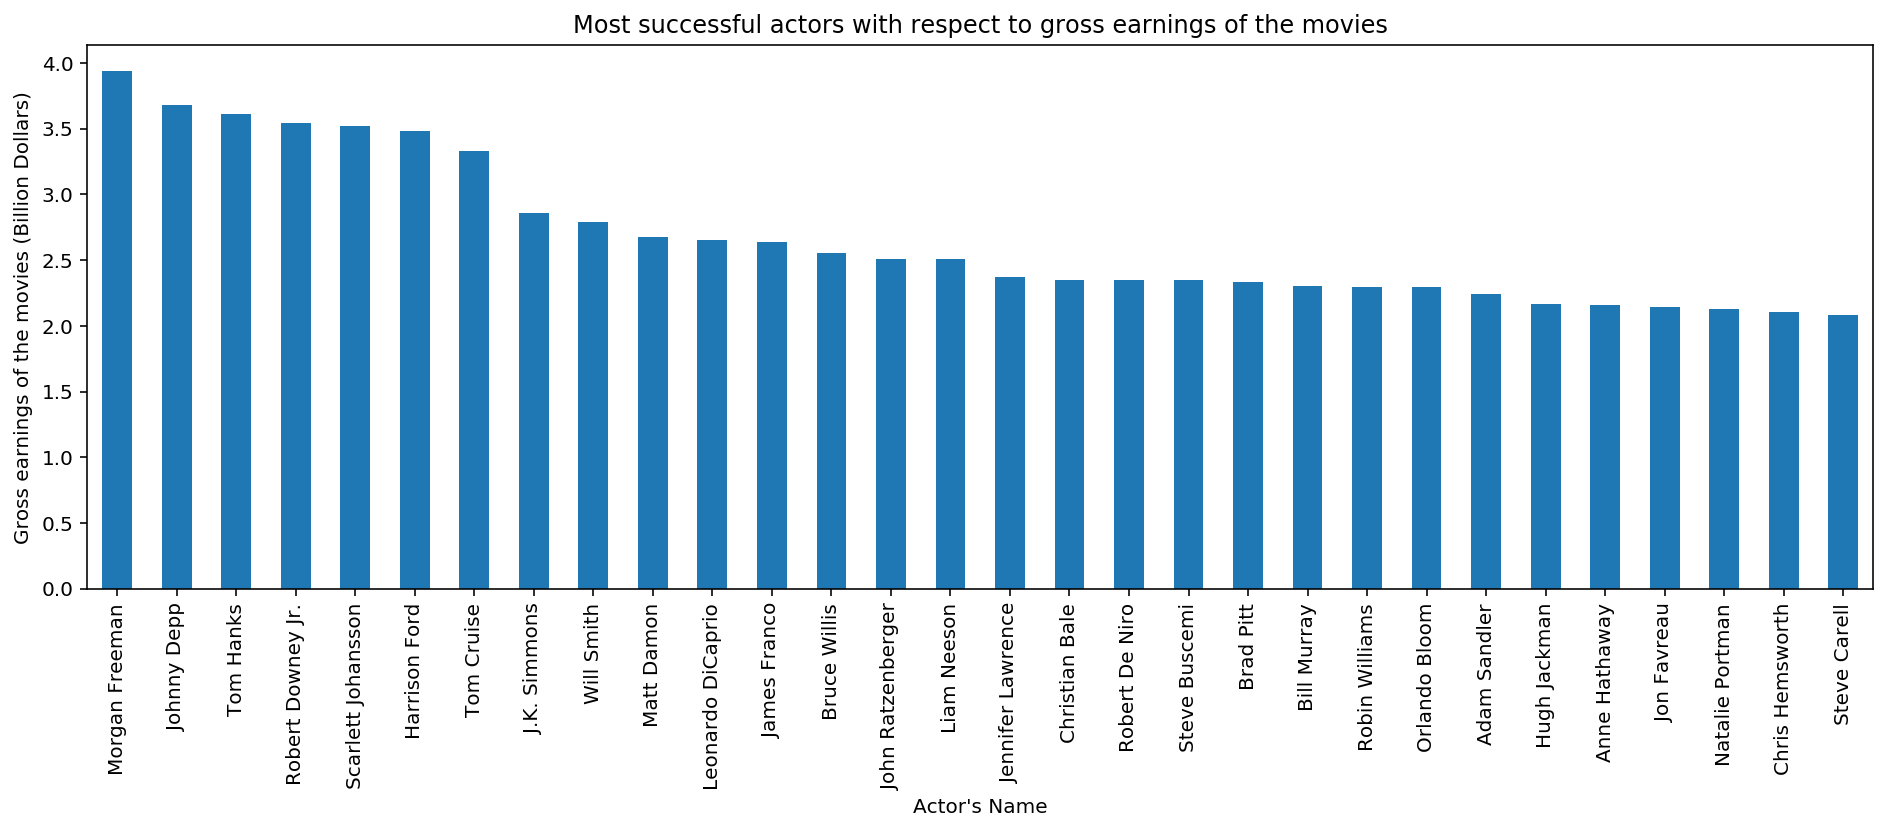

In [31]:
plot2 = actor[:30].plot.bar(rot=90, title='Most successful actors with respect to gross earnings of the movies', figsize = (16, 5))
plot2.set_xlabel("Actor's Name")
plot2.set_ylabel("Gross earnings of the movies (Billion Dollars)");

#### 3.2.2. Lorez Curve: Wealth Imbalance among actors

In [32]:
ACT = np.array(actor)
ACT_lorenz = ACT.cumsum() / ACT.sum()
ACT_lorenz = np.insert(ACT_lorenz, 0, 0)

In [33]:
# calculating the gini coefficient for gross earnings distribution among actors
gini(ACT)

0.7338606262391367

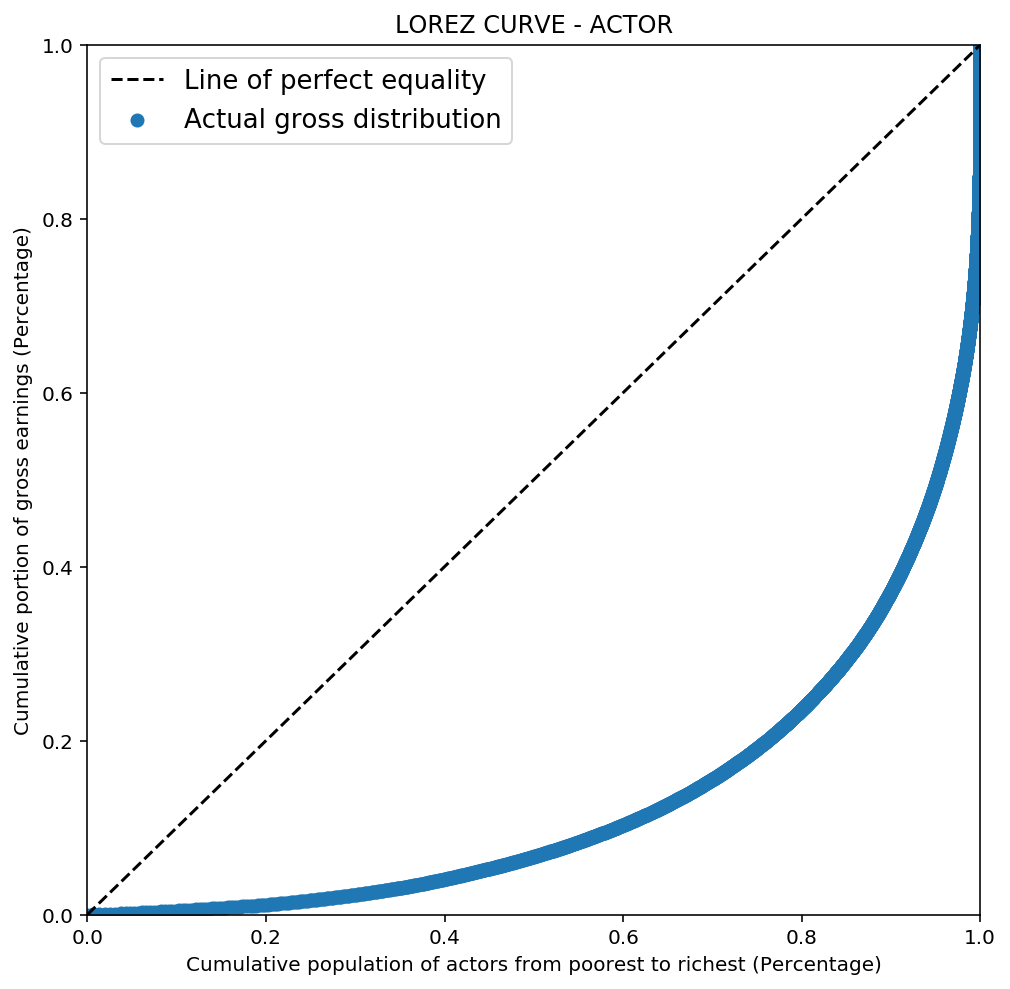

In [34]:
# setting the size of the plot
plt.figure(figsize=(8,8))
# plotting the gini curve
plt.scatter(ACT_lorenz,np.arange(ACT_lorenz.size)/(ACT_lorenz.size-1))
# plotting the diagonal line of equality 
plt.plot([0,1], [0,1], color = 'k', linestyle='dashed')
# setting the limits of x-axis and y-axis
plt.xlim([0,1])
plt.ylim([0,1])
# adding annotations
plt.xlabel('Cumulative population of actors from poorest to richest (Percentage)')
plt.ylabel('Cumulative portion of gross earnings (Percentage)')
plt.title('LOREZ CURVE - ACTOR')
plt.legend(['Line of perfect equality', 
            'Actual gross distribution'],
           loc="upper left",
           prop={"size":13})
# plotting the plot
plt.show();

**Conclusion**: the graphical representation together with the gini coefficient of 0.734 for the gross earnings distribution among actors indicate that there is a relatively huge gap between the top successful actors with the least successful ones. In another word, the minority of the most successful actors has accumlated a large proportion of wealth (gross earnings). Meanwhile, the majority of the least successful actors have their wealth which is unquestionably incomparable with the minority mentioned earlier. Similarly to the gross distribution among directors, actors are likely to encounter tough competitions among their peers, and having fairly small chances to be widely known in the movie industry.

## 4. Movie Comparison 
### 4.1. An overview of IMDB score, Gross Earning and Movie Facebook Likes
Firstly, an overview of `imdb_score`, `gross` and `movie_facebook_likes` is given to provide deeper understandings about how those variables' distributions are determined so that a comparison of any two given movies will be drawn more clearly in the bigger pictures regarding those three variables' distribution.

In [35]:
df[['imdb_score', 'gross', 'movie_facebook_likes']].describe()

imdb_score         gross  movie_facebook_likes
count  3737.000000  3.737000e+03           3737.000000
mean      6.464249  5.229061e+07           9276.420926
std       1.054724  6.974153e+07          21394.566371
min       1.600000  1.620000e+02              0.000000
25%       5.900000  8.047690e+06              0.000000
50%       6.600000  2.995944e+07            226.000000
75%       7.200000  6.673499e+07          11000.000000
max       9.300000  7.605058e+08         349000.000000

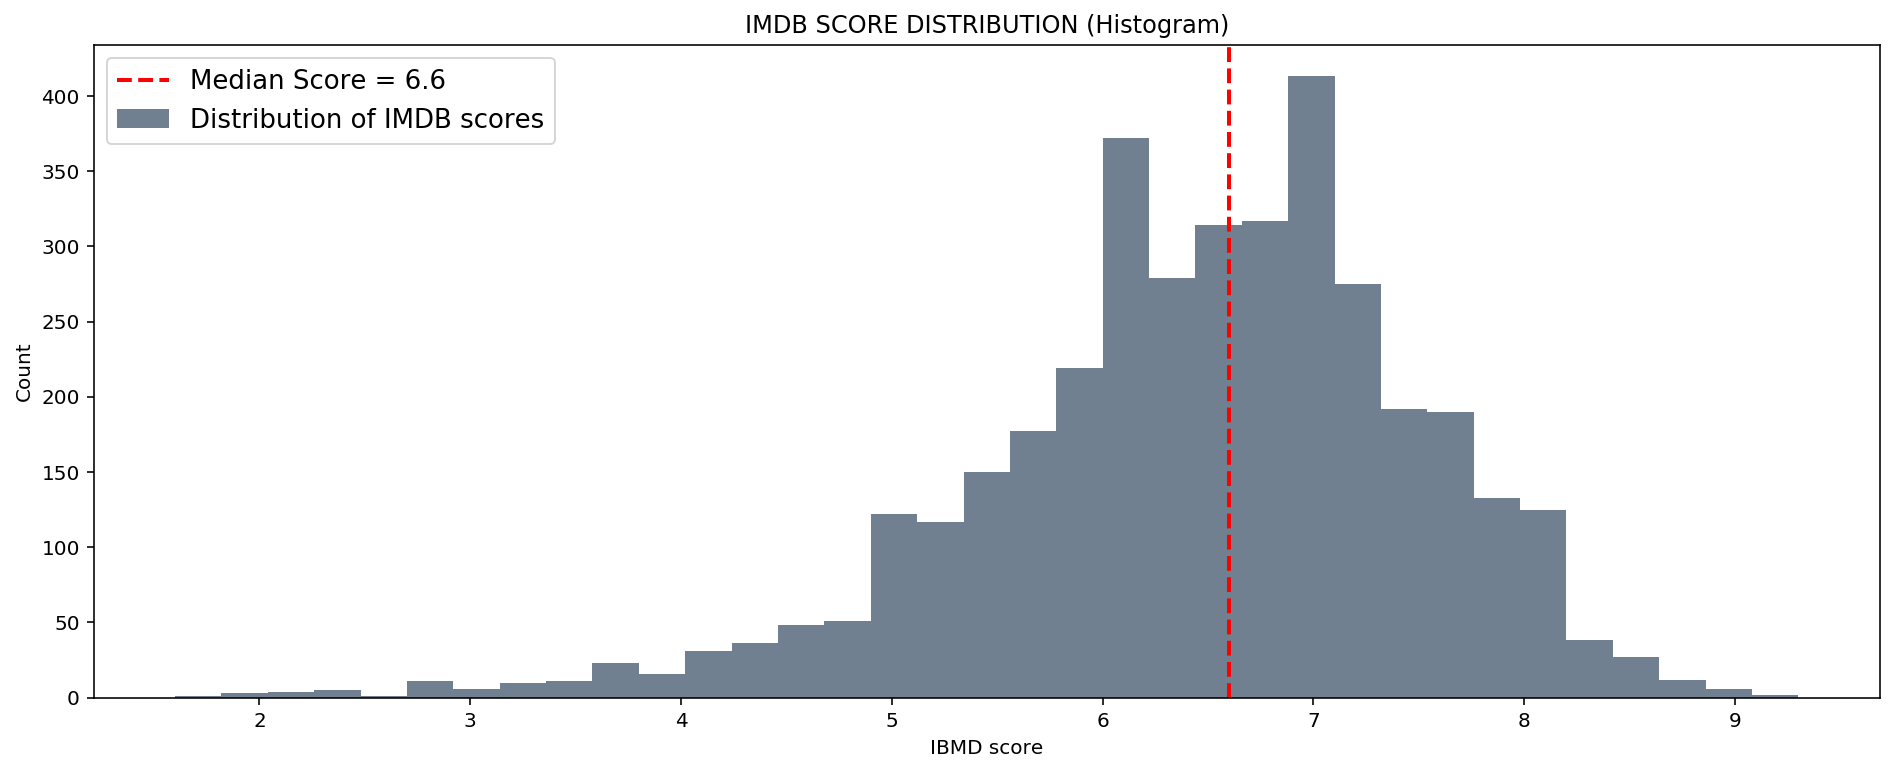

In [36]:
bin_size = 35
df['imdb_score'].hist(bins = bin_size, figsize = (16,6),  color = 'slategrey').grid(False)
plt.axvline(x = df['imdb_score'].median(), color = 'r', linestyle='dashed', linewidth=2)
plt.legend(['Median Score = ' + str(df['imdb_score'].median()), 
            'Distribution of IMDB scores'],
           loc="upper left",
           prop={"size":13})
plt.title('IMDB SCORE DISTRIBUTION (Histogram)')
plt.xlabel('IBMD score')
plt.ylabel('Count')
plt.show();

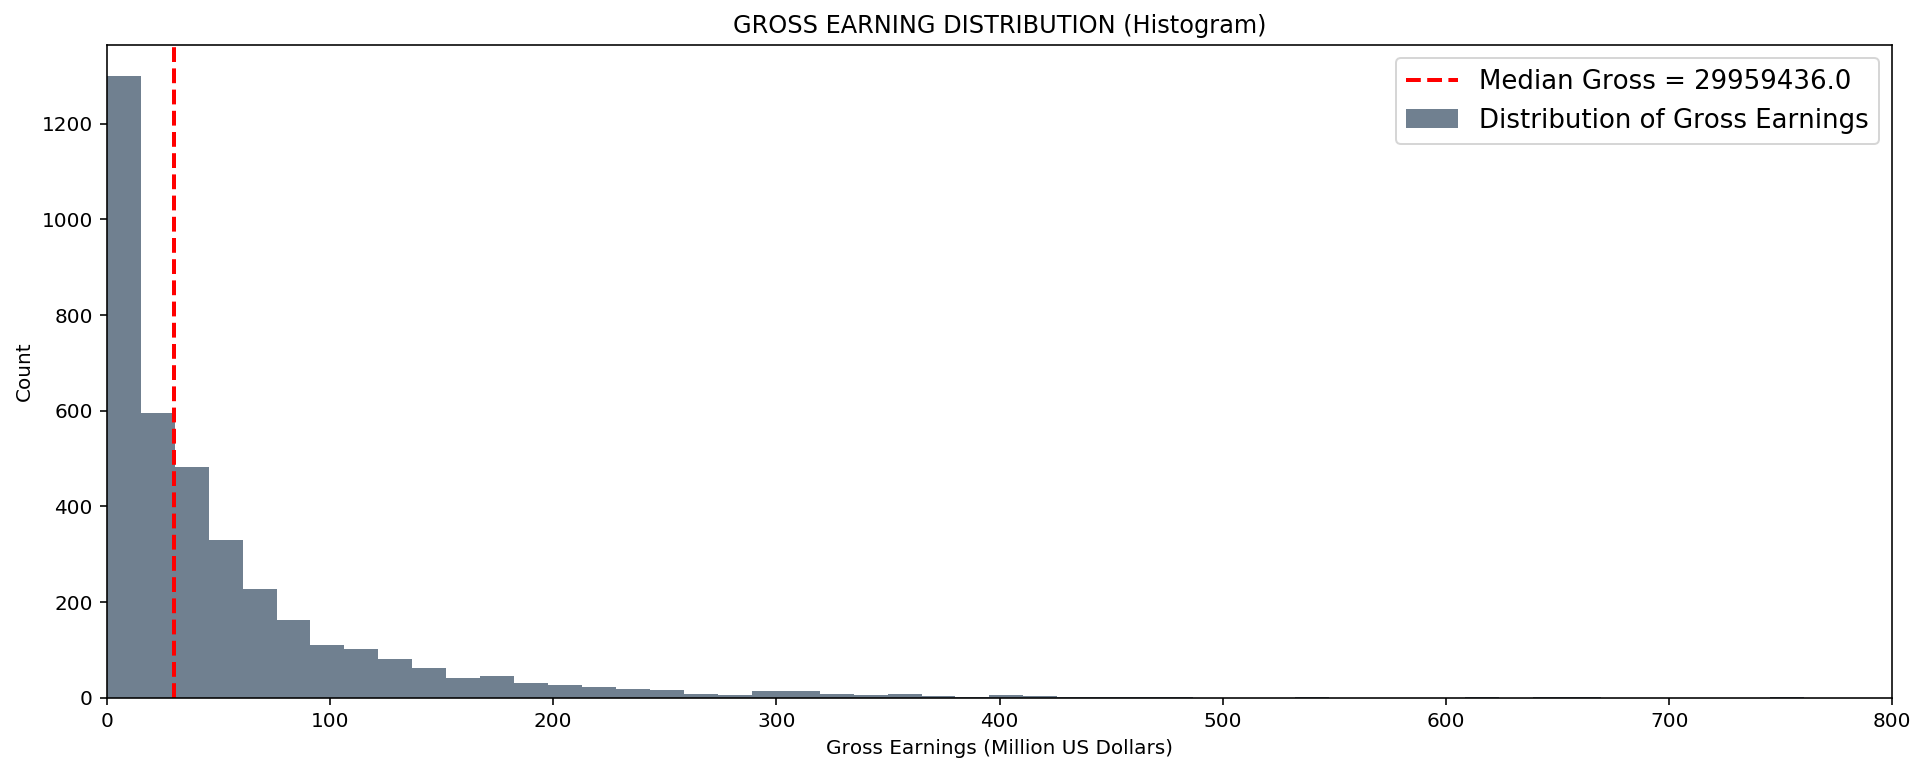

In [37]:
bin_size = 50
(df['gross']/1e6).hist(bins = bin_size, figsize = (16,6), color = 'slategrey').grid(False)
plt.axvline(x = df['gross'].median()/1e6, color = 'r', linestyle='dashed', linewidth=2)
plt.legend(['Median Gross = ' + str(df['gross'].median()), 
            'Distribution of Gross Earnings'],
           loc="upper right", 
           prop={"size":13})
plt.title('GROSS EARNING DISTRIBUTION (Histogram)')
plt.xlabel('Gross Earnings (Million US Dollars)')
plt.ylabel('Count')
plt.xlim((0,800))
plt.show();

In [38]:
bin_size = 30
df['movie_facebook_likes'].hist(bins = bin_size, figsize = (16,6), color = 'slategrey').grid(False)
plt.axvline(x = df['movie_facebook_likes'].median(), color = 'r', linestyle='dashed', linewidth=2)
plt.legend(['Median Facebook Likes = ' + str(df['movie_facebook_likes'].median()), 
            'Distribution of Movie Facebook Likes'],
           loc="upper right", prop={"size":13})
plt.title('MOVIE FACEBOOK LIKES DISTRIBUTION (Histogram)')
plt.xlabel('No. of Movie Facebook Likes')
plt.ylabel('Count')
plt.xlim((0,350000))
plt.show();

**Conclusion:** 
- In terms of IMDB scores, it has a negatively skewed distribution which somehow indicates median as the preferable centrality measurement. The median of 6.6 shows that 50% of the movies have higher IMDB scores than that median and the others of 50% have lower IMDB scores that the median. Specifically, as affected by the negatively skewed distribution, the left tail is much widespread than the right tail. In another word, the "good" movies might have more consistent quality than the "bad" ones. 
- For gross earnings, it indicates an extremely positive ditribution which is highly likely to have numerous extreme outliers on the right tail accordingly. It might also mean that there are some movies having distinctively huge gap of gross earnings with the rest of the population. 
- Lastly, talking about the movie facebook likes, it possesses a similar distribution to the gross earninings'. It features an extremely postively skewed distribution with outliers setting themselves so distant from the rest. 


### 4.2. A comparison between two chosen movies in the database
In this case, Avatar and Transcendence are chosen to be compared with each other and to plot themselves on the distributions of `imdb_score`, `gross` and `movie_facebook_likes`. A short conclusion based upon graphical representations and quantified figures will be drawn  

In [39]:
movie1 = 'Avatar'
movie2 = 'Transcendence'
movie1_color = 'orange'
movie2_color = 'deepskyblue'

#### 4.2.1. IMDB Comparison

In [40]:
comp_IMDB = df[['movie_title', 'imdb_score']][(df['movie_title'] == movie1) | (df['movie_title'] == movie2)]
comp_IMDB

movie_title  imdb_score
0           Avatar         7.9
343  Transcendence         6.3

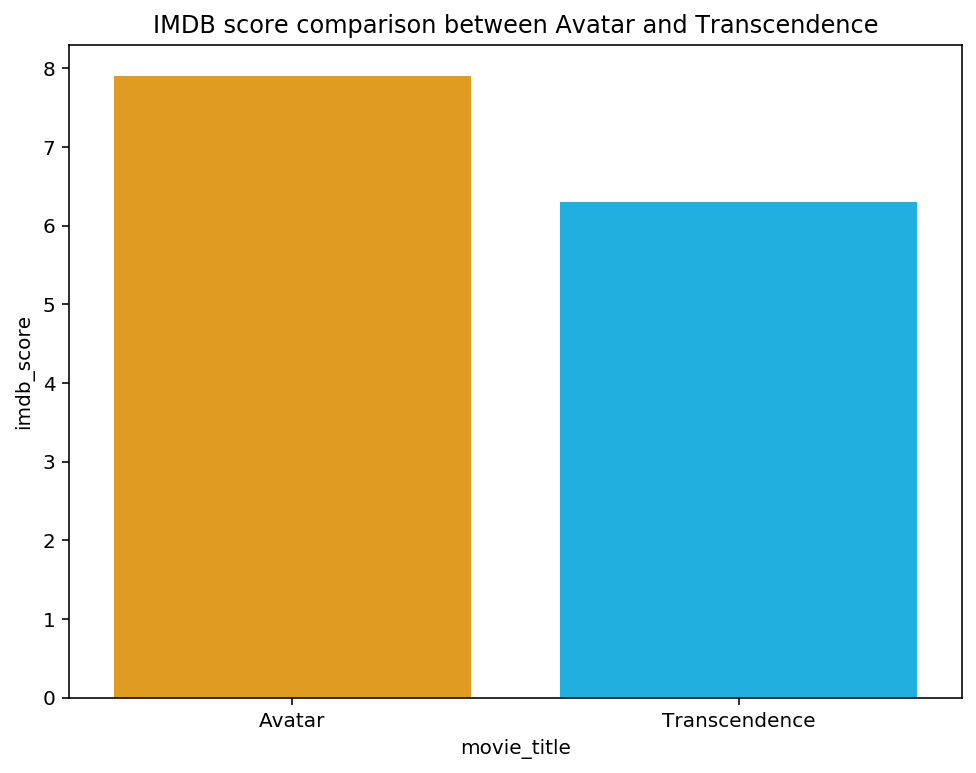

In [41]:
ax = sns.barplot(x = 'movie_title', y = 'imdb_score', data = comp_IMDB, palette = (movie1_color, movie2_color))
ax.figure.set_size_inches(8, 6)
plt.title('IMDB score comparison between ' + movie1 + ' and ' + movie2)
plt.show();

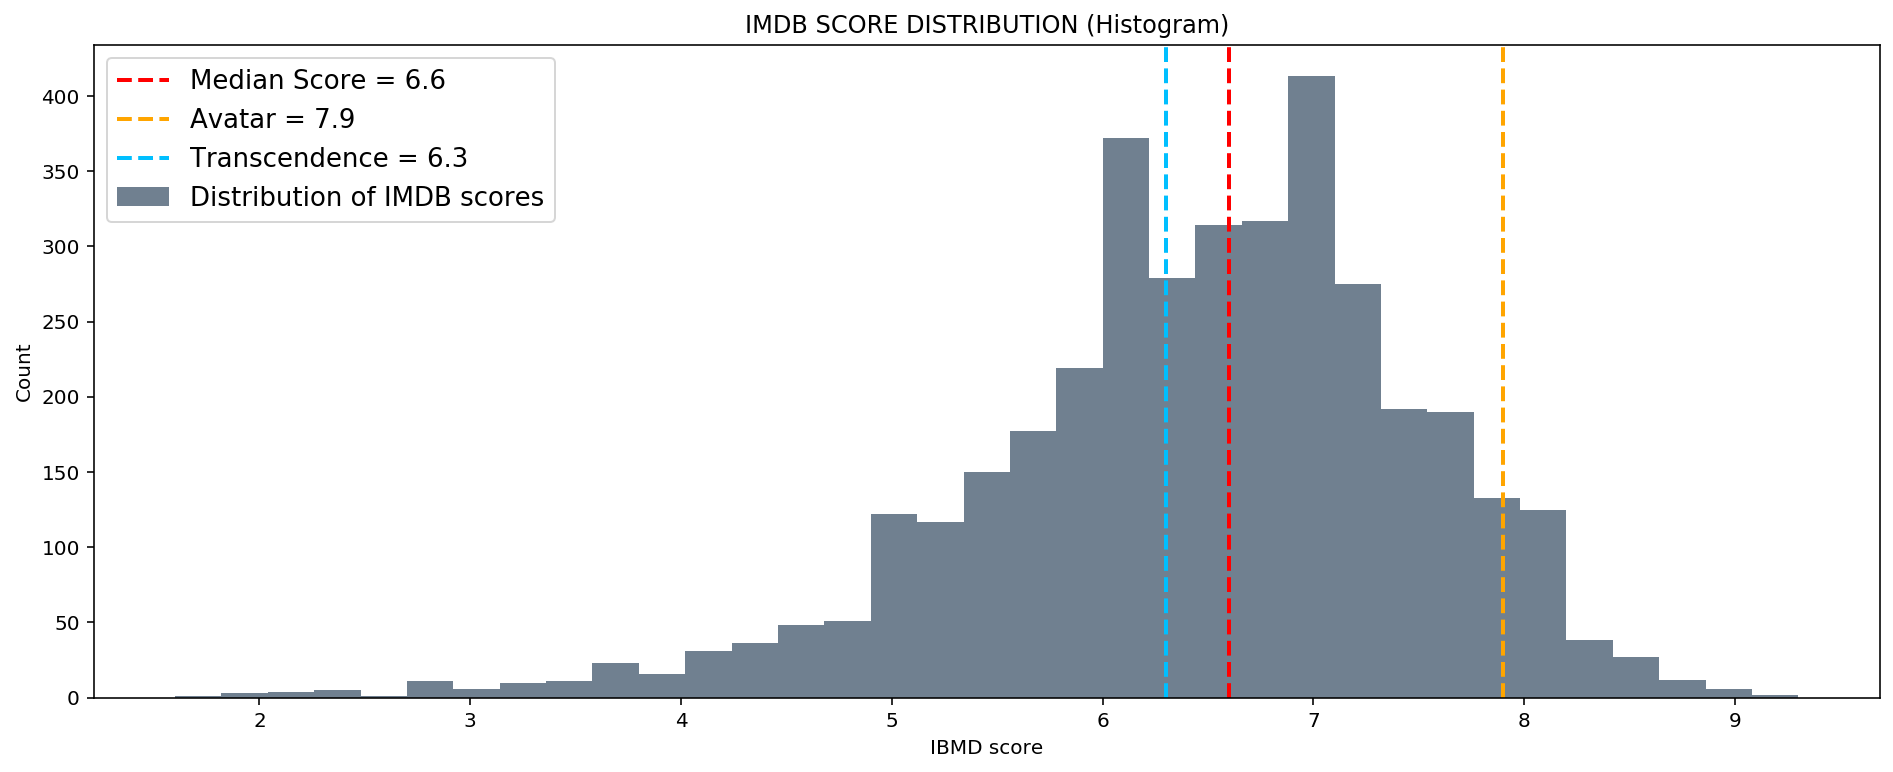

In [42]:
bin_size = 35
df['imdb_score'].hist(bins = bin_size, figsize = (16,6),  color = 'slategrey').grid(False)
plt.axvline(x = df['imdb_score'].median(), color = 'r', linestyle='dashed', linewidth=2)
plt.axvline(x = comp_IMDB.iloc[0,1], color = movie1_color, linestyle='dashed', linewidth=2)
plt.axvline(x = comp_IMDB.iloc[1,1], color = movie2_color, linestyle='dashed', linewidth=2)
plt.legend(['Median Score = ' + str(df['imdb_score'].median()), 
            movie1 + ' = ' + str(comp_IMDB.iloc[0,1]), 
            movie2 + ' = ' + str(comp_IMDB.iloc[1,1]),
            'Distribution of IMDB scores'],
           loc="upper left",
           prop={"size":13})
plt.title('IMDB SCORE DISTRIBUTION (Histogram)')
plt.xlabel('IBMD score')
plt.ylabel('Count')
plt.show();

**Conclusion:** With regards to IMDB scores, Avatar seems to be a better oppenent than the Transcendence with the scores of 7.9 and 6.3 respectively. Besides, Avatar could be categorised a "good" movie based on comparing with the median value of 6.6. Meanwhile, Transcendence might have more critics with the score being lower than the median "threshold". 

#### 4.2.2. Gross Earning Comparison

In [43]:
# NB. gross in million us dollars
comp_gross = df[['movie_title', 'gross']][(df['movie_title'] == movie1) | (df['movie_title'] == movie2)]
comp_gross['gross'] = comp_gross['gross']/1e6
comp_gross

movie_title       gross
0           Avatar  760.505847
343  Transcendence   23.014504

In [44]:
ax = sns.barplot(x = 'movie_title', y = 'gross', data = comp_gross, palette = (movie1_color, movie2_color))
ax.figure.set_size_inches(8, 6)
plt.title('IMDB score comparison between ' + movie1 + ' and ' + movie2)
plt.ylabel('gross earnings (million US dollars)')
plt.show();

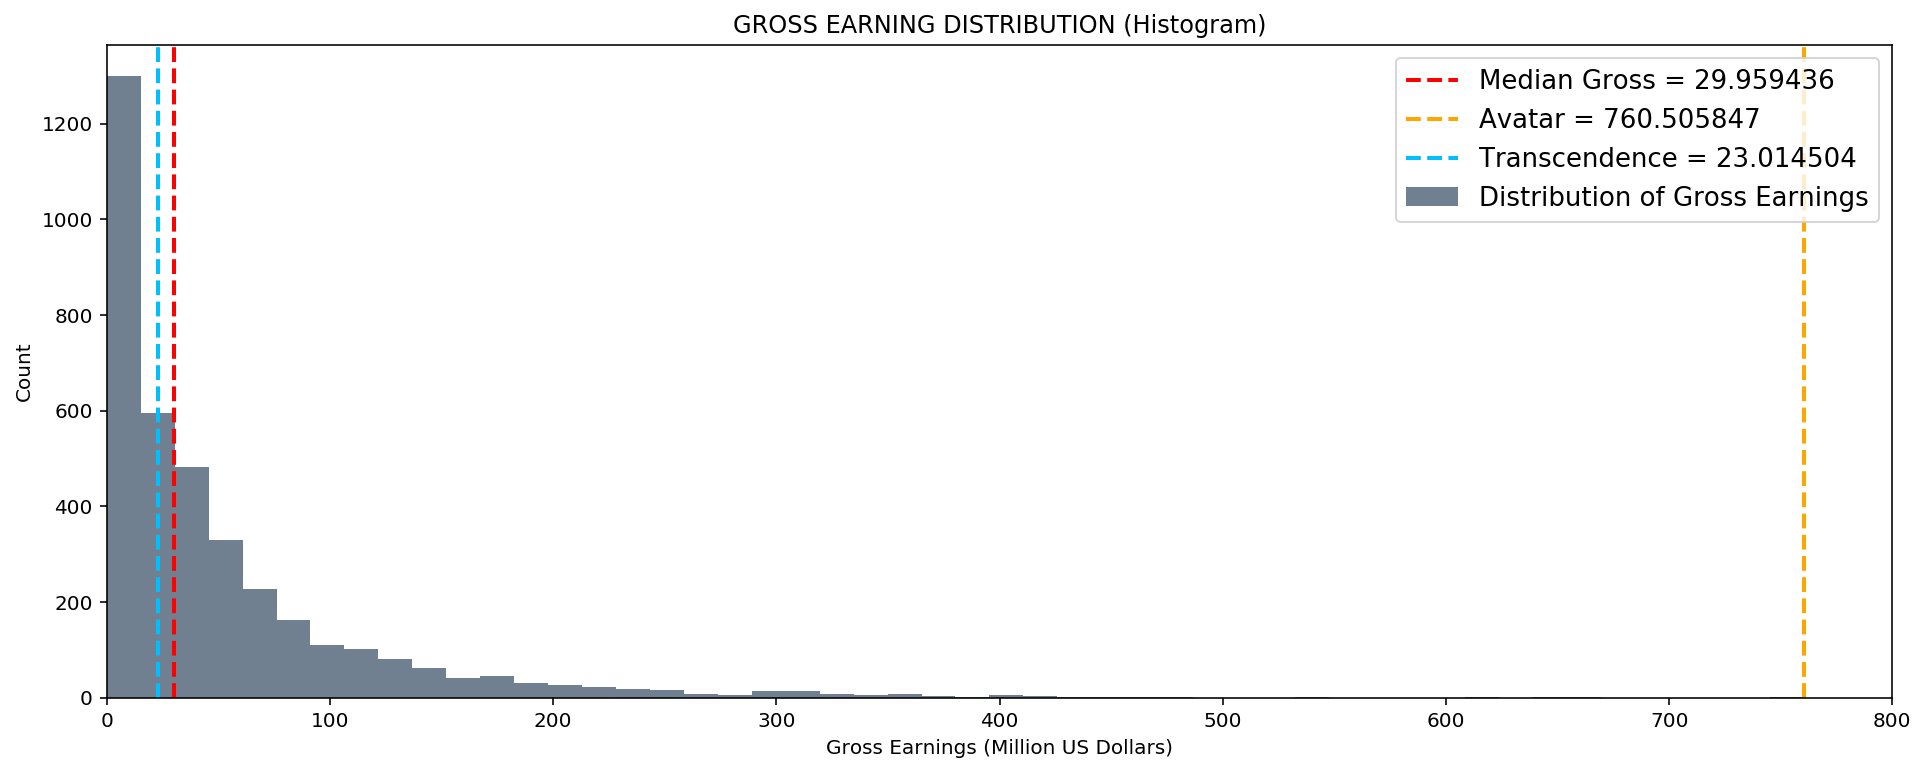

In [45]:
bin_size = 50
(df['gross']/1e6).hist(bins = bin_size, figsize = (16,6), color = 'slategrey').grid(False)
plt.axvline(x = df['gross'].median()/1e6, color = 'r', linestyle='dashed', linewidth=2)
plt.axvline(x = comp_gross.iloc[0,1], color = movie1_color, linestyle='dashed', linewidth=2)
plt.axvline(x = comp_gross.iloc[1,1], color = movie2_color, linestyle='dashed', linewidth=2)
plt.legend(['Median Gross = ' + str(df['gross'].median()/1e6), 
            movie1 + ' = ' + str(comp_gross.iloc[0,1]), 
            movie2 + ' = ' + str(comp_gross.iloc[1,1]),
            'Distribution of Gross Earnings'],
           loc="upper right", 
           prop={"size":13})
plt.title('GROSS EARNING DISTRIBUTION (Histogram)')
plt.xlabel('Gross Earnings (Million US Dollars)')
plt.ylabel('Count')
plt.xlim((0,800))
plt.show();

**Conclusion:** talking about the gross earnings, Avatar is the obvious winner to the Transcendence. It reached closely to the record of the movie with the highest gross earnings. Meanwhile, Transcendence's gross is even below the median gross. This huge gap might indicate how the movie industry has been polarised in terms of the gross earnings to a certain extent.

#### 4.2.3. Facebook Likes

In [46]:
comp_movie_FB_likes = df[['movie_title', 'movie_facebook_likes']][(df['movie_title'] == movie1) | (df['movie_title'] == movie2)]
comp_movie_FB_likes

movie_title  movie_facebook_likes
0           Avatar                 33000
343  Transcendence                 37000

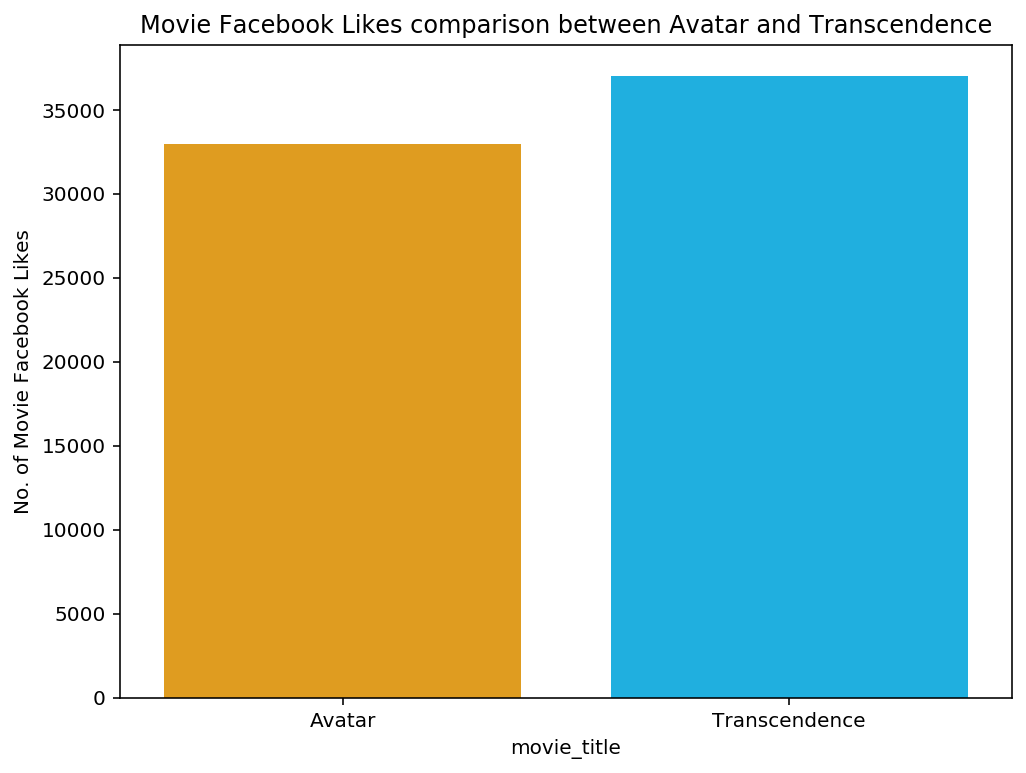

In [47]:
ax = sns.barplot(x = 'movie_title', y = 'movie_facebook_likes', data = comp_movie_FB_likes, palette = (movie1_color, movie2_color))
ax.figure.set_size_inches(8, 6)
plt.title('Movie Facebook Likes comparison between ' + movie1 + ' and ' + movie2)
plt.ylabel('No. of Movie Facebook Likes')
plt.show();

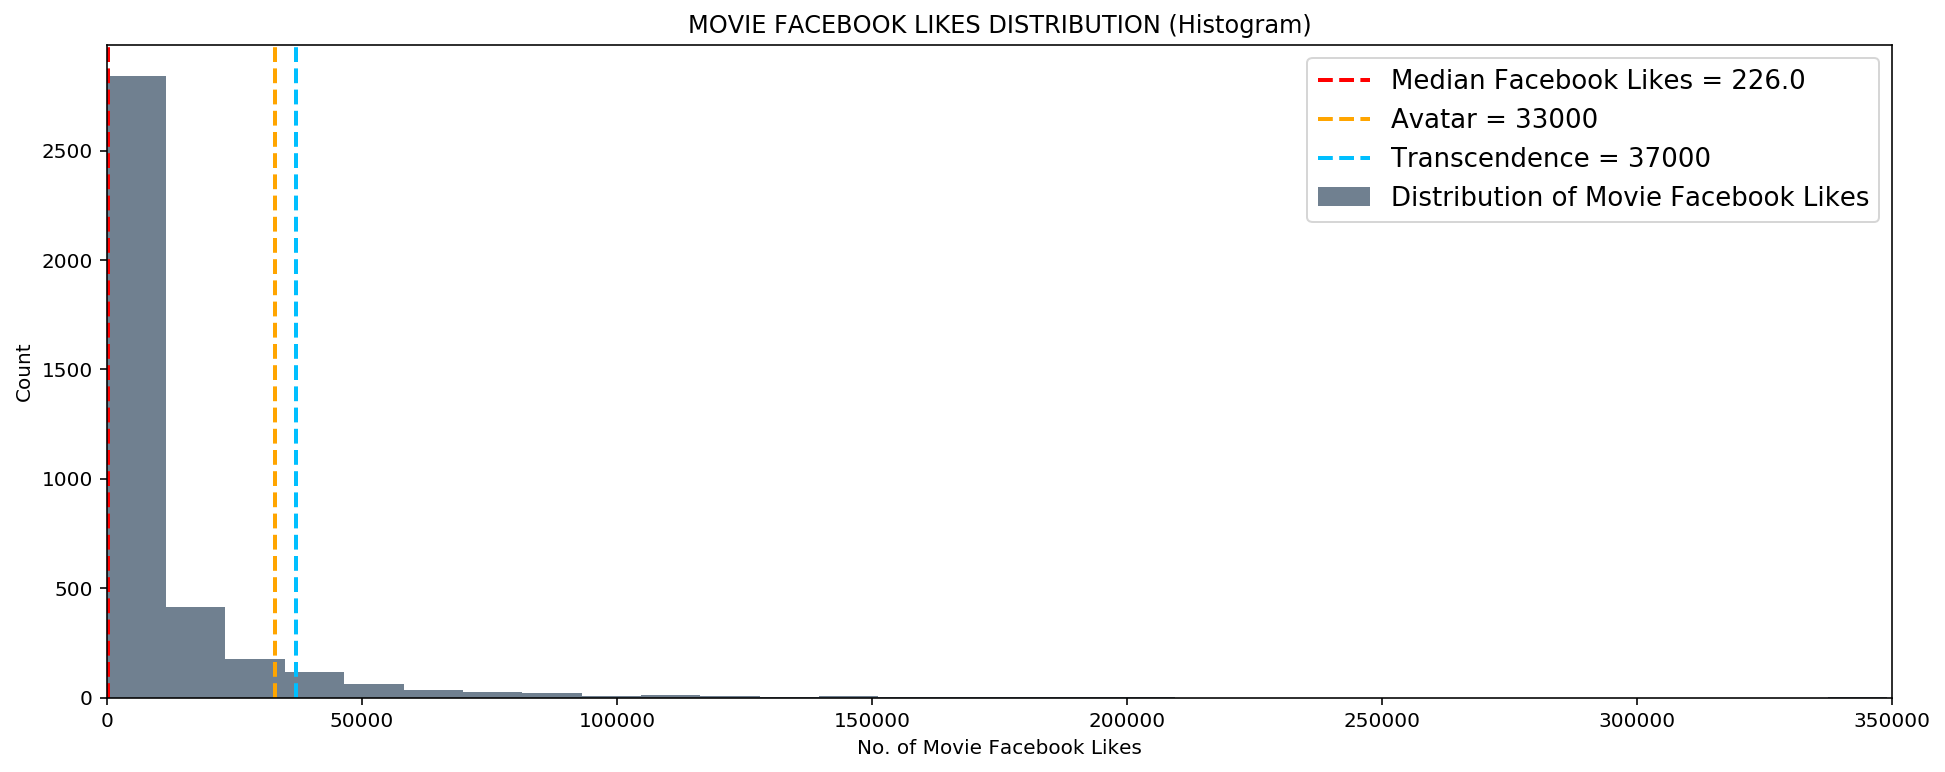

In [48]:
bin_size = 30
df['movie_facebook_likes'].hist(bins = bin_size, figsize = (16,6), color = 'slategrey').grid(False)
plt.axvline(x = df['movie_facebook_likes'].median(), color = 'r', linestyle='dashed', linewidth=2)
plt.axvline(x = comp_movie_FB_likes.iloc[0,1], color = movie1_color, linestyle='dashed', linewidth=2)
plt.axvline(x = comp_movie_FB_likes.iloc[1,1], color = movie2_color, linestyle='dashed', linewidth=2)
plt.legend(['Median Facebook Likes = ' + str(df['movie_facebook_likes'].median()), 
            movie1 + ' = ' + str(comp_movie_FB_likes.iloc[0,1]), 
            movie2 + ' = ' + str(comp_movie_FB_likes.iloc[1,1]),
            'Distribution of Movie Facebook Likes'],
           loc="upper right", prop={"size":13})
plt.title('MOVIE FACEBOOK LIKES DISTRIBUTION (Histogram)')
plt.xlabel('No. of Movie Facebook Likes')
plt.ylabel('Count')
plt.xlim((0,350000))
plt.show();

**Conclusion:** Taking about the polularity on the social platform, those two movies might be closely competed with each other with their achievements in the number of facebook likes for their movies. Their figures are both suprisingly good in comparison with the median value. 

## 5. Distribution of the Gross Earnings

### 5.1. Choosing the range of years

In [49]:
year_start = 1927
year_end = 2016

In [50]:
selected_gross_by_year = df[['title_year','gross']][(df['title_year'] >= year_start) & (df['title_year'] <= year_end)]
selected_gross_by_year['gross'] = selected_gross_by_year['gross']/1e6

### 5.2. Number of Movies in Each Year in the Chosen Year Range

In [51]:
# change 'title_year' to integer value
selected_gross_by_year['title_year'] = selected_gross_by_year['title_year'].astype('int64')

# plotting
ax = sns.countplot(data=selected_gross_by_year, x = 'title_year',color = 'slategrey')
ax.figure.set_size_inches(16, 6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_axisbelow(True)
plt.title('Number of movies in individual years')
plt.xlabel('Year')
plt.grid(color = 'gainsboro', linestyle='dashed')
plt.show();

**Conclusion:** the dataset offers an imbalanced number of movies for each year as clearly shown by the graph above. This pattern has a very strong effect on how the distributions of the gross earnings are shaped as years passing. The "old time" movies might not be representative enough when their distribution will be highly biased by small number of movies in the old time. However, it could somehow be a decent reference to observe how the distribution had been shaped during a chosen period of time.  

### 5.3 Distribution of Gross Earning in the Chosen Year Range

In [52]:
max_gross_by_year = selected_gross_by_year.groupby('title_year').max()['gross']
min_gross_by_year = selected_gross_by_year.groupby('title_year').min()['gross']
mean_gross_by_year = selected_gross_by_year.groupby('title_year').mean()['gross']
median_gross_by_year = selected_gross_by_year.groupby('title_year').median()['gross']

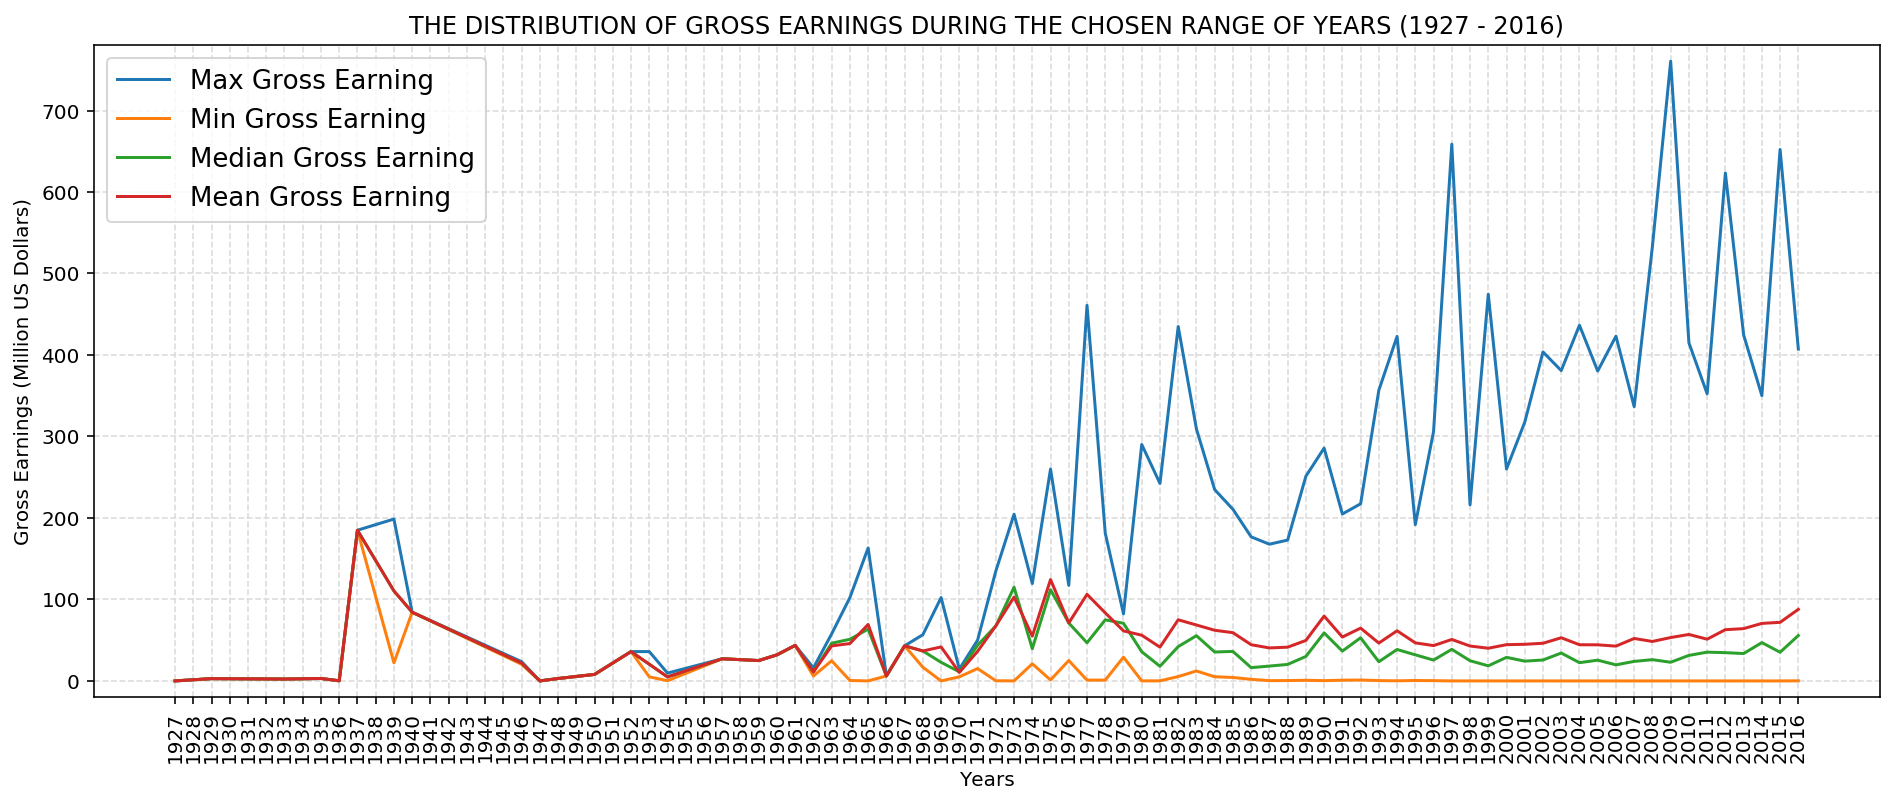

In [53]:
max_gross_by_year.plot(figsize = (16,6))
min_gross_by_year.plot()
median_gross_by_year.plot()
mean_gross_by_year.plot()
plt.xticks(np.arange(year_start, year_end + 1, 1), rotation = 90)
plt.grid(color = 'gainsboro', linestyle='dashed')
plt.ylim((selected_gross_by_year['gross'].min() - 20, selected_gross_by_year['gross'].max() + 20))
plt.title('THE DISTRIBUTION OF GROSS EARNINGS DURING THE CHOSEN RANGE OF YEARS (' + str(year_start) +' - ' + str(year_end) +')')
plt.xlabel('Years')
plt.ylabel('Gross Earnings (Million US Dollars)')
plt.legend(['Max Gross Earning', 
            'Min Gross Earning', 
            'Median Gross Earning',
            'Mean Gross Earning'],
           loc="upper left", 
           prop={"size":13});

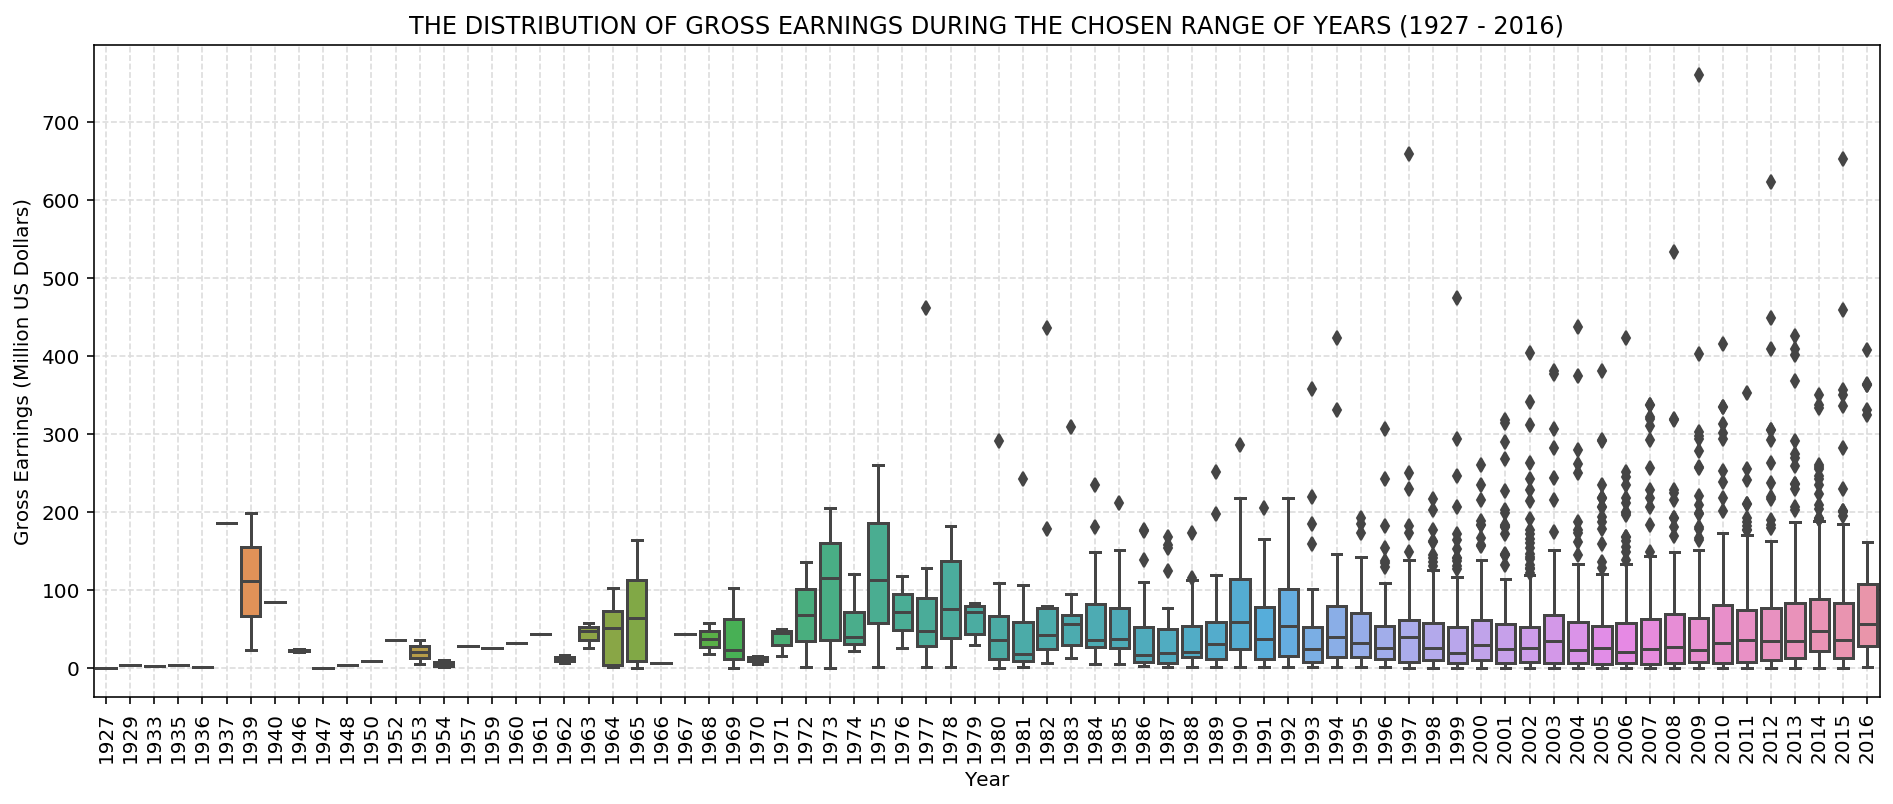

In [54]:
ax = sns.boxplot(x='title_year', y='gross', data=selected_gross_by_year)
ax.figure.set_size_inches(16,6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_axisbelow(True)
plt.title('THE DISTRIBUTION OF GROSS EARNINGS DURING THE CHOSEN RANGE OF YEARS (' + str(year_start) +' - ' + str(year_end) +')')
plt.xlabel('Year')
plt.grid(color = 'gainsboro', linestyle='dashed')
plt.ylabel('Gross Earnings (Million US Dollars)');

**Conclusion:** Considering the whole period from 1927 to 2016, there is no clear tendency of the gross earnings' median and mean. This could be objectively explained by the imbalanced number of movies in each recorded year as mentioned clearly above. However, the most distinct feature might come from the each recored year's outliers or maximum values from 1975 to 2016 in both the line graph and boxplot as they clearly show an increasing trend. 

## 6. Genre Analysis
### 6.1. An Overview of Different Movie Genres in the Dataset
#### 6.1.1. List of genres

In [55]:
# creating a set of genres, i.e. 'genre_set', in the alphabetical order 
test = df['genres'].str.split('|')
genre_set = set()
for i in test:
    for j in i:
        genre_set.add(j)
genre_set = sorted(genre_set)
for i in genre_set: 
    print(i)

Action
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Film-Noir
History
Horror
Music
Musical
Mystery
Romance
Sci-Fi
Sport
Thriller
War
Western


#### 6.1.2. Number of movies for each genre

In [56]:
temp = dict()
for i in genre_set:
    r = df['genres'].str.contains(i)
    temp[i] = df[r].count()[0]
k = pd.Series(temp)
plot3 = k.plot.bar(rot=90, title= 'BARPLOT OF NUMBER OF MOVIES FOR EACH MOVIE GENRE', 
                   figsize = (16, 5))
plot3.set_xlabel("Movie Genre")
plot3.set_ylabel("Number of Movies")
plot3.grid(linestyle='dashed', linewidth='0.5', color='grey')
plot3.set_axisbelow(True);

**Conclusion:** From the chart above, number of movies for each of the movie genres are different from each other. Drama movies are the most produced, followed by Comedy and Thriller ones. The least produced movies are Film-Noir, Documentary as well as Western. This indication might give us an insight into preferences of movie audiences that particular movie genres are widely favourited by the public. Taking further, this information might be a reasonable reference for movie producers who want to capitalise upon the most favourite movie genres that could potentially generate revenues. 

#### 6.1.3. IMDB score distribution grouped by different movie genres

In [57]:
# creating a list of imdb scores for each of movie genre, i.e. 'imdb_of_all_genres'
imdb_of_all_genres = []
for i in genre_set:
    r = df['genres'].str.contains(i)
    imdb_for_single_genre = df[r]['imdb_score']
    imdb_of_all_genres.append(imdb_for_single_genre)

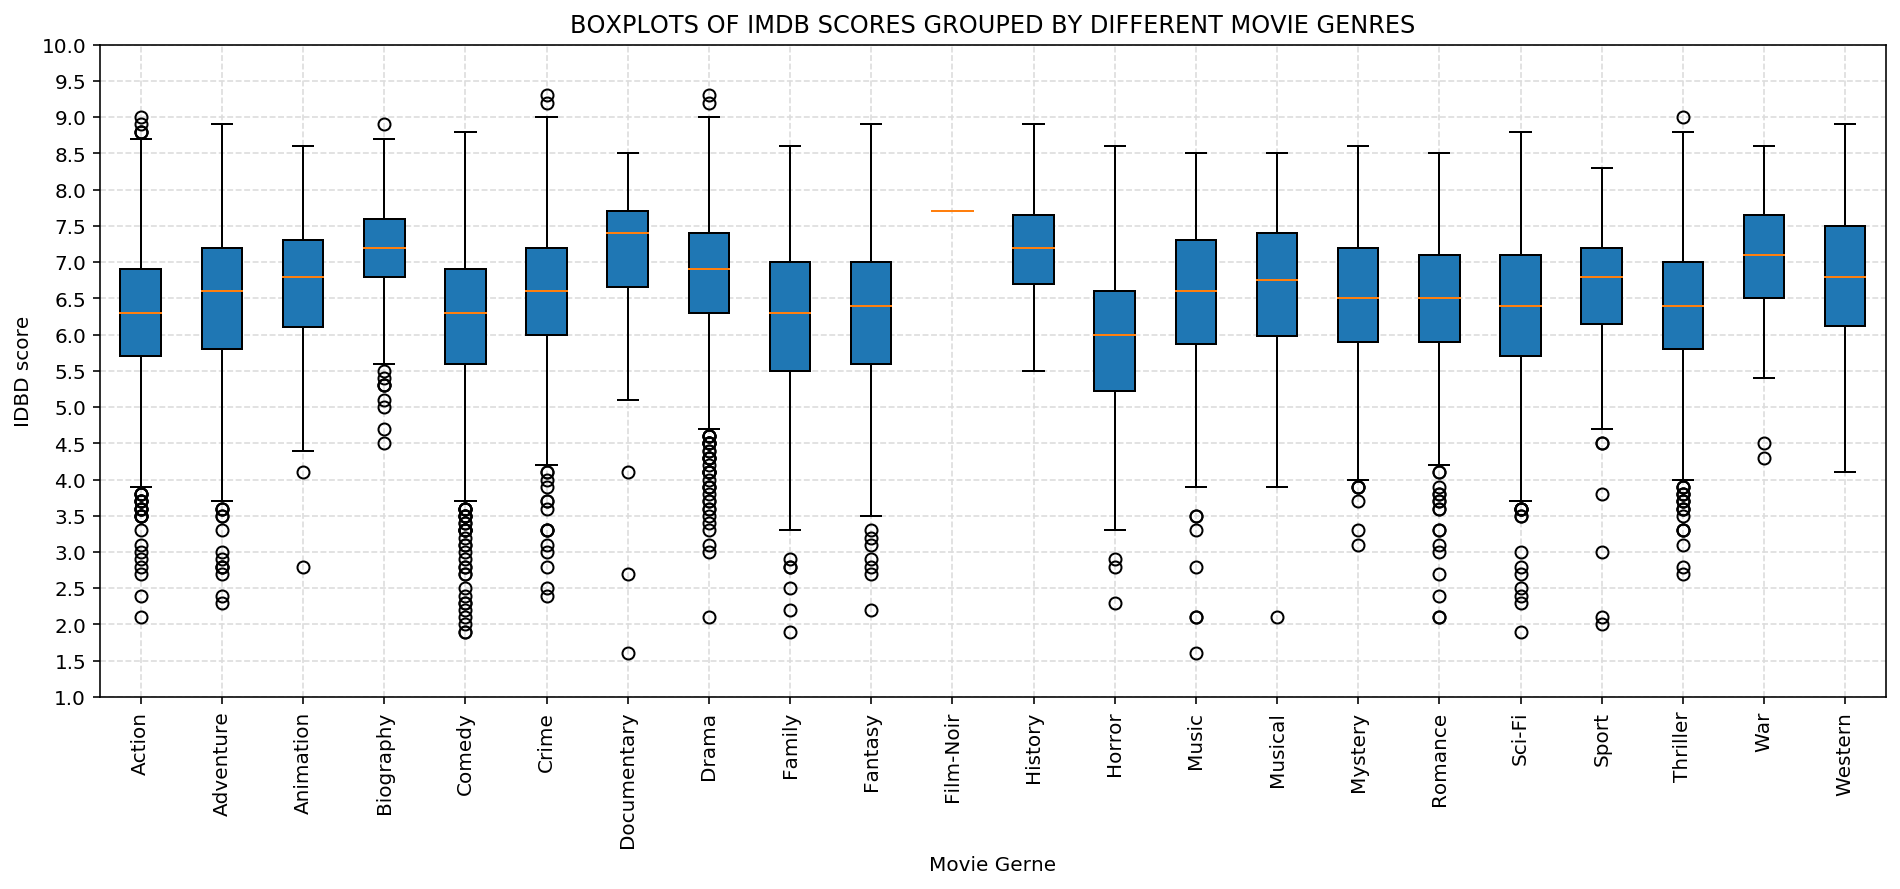

In [58]:
plt.figure(figsize=(16,6))
box = plt.boxplot(imdb_of_all_genres, patch_artist = True)
plt.xticks(np.arange(1,len(genre_set)+1, 1), genre_set, rotation = 90)
plt.yticks(np.arange(1,10.5, 0.5))
plt.xlabel('Movie Gerne')
plt.ylabel('IDBD score')
plt.title('BOXPLOTS OF IMDB SCORES GROUPED BY DIFFERENT MOVIE GENRES')
plt.grid(color = 'gainsboro', linestyle='dashed')
plt.show();

**Conclusion:** Distributions of the IDMB scores of different movie genres seem to be visually heterogeneous. To examine whether the differences between those distributions are statistically significant, hypothetical testings such as two-sample t-test, parametric testing, or Mann Whitney U test and Wilcoxon Rank Sum Test, non-parametric testing, are needed. However, those steps are not within the scope of this project.

#### 6.1.4. Gross earnings grouped by different movie genres

In [59]:
# creating a list of gross earnings for each of movie genre, i.e. 'gross_of_all_genres'
gross_of_all_genres = []
for i in genre_set:
    r = df['genres'].str.contains(i)
    gross_for_single_genre = df[r]['gross']/1e8
    gross_of_all_genres.append(gross_for_single_genre)

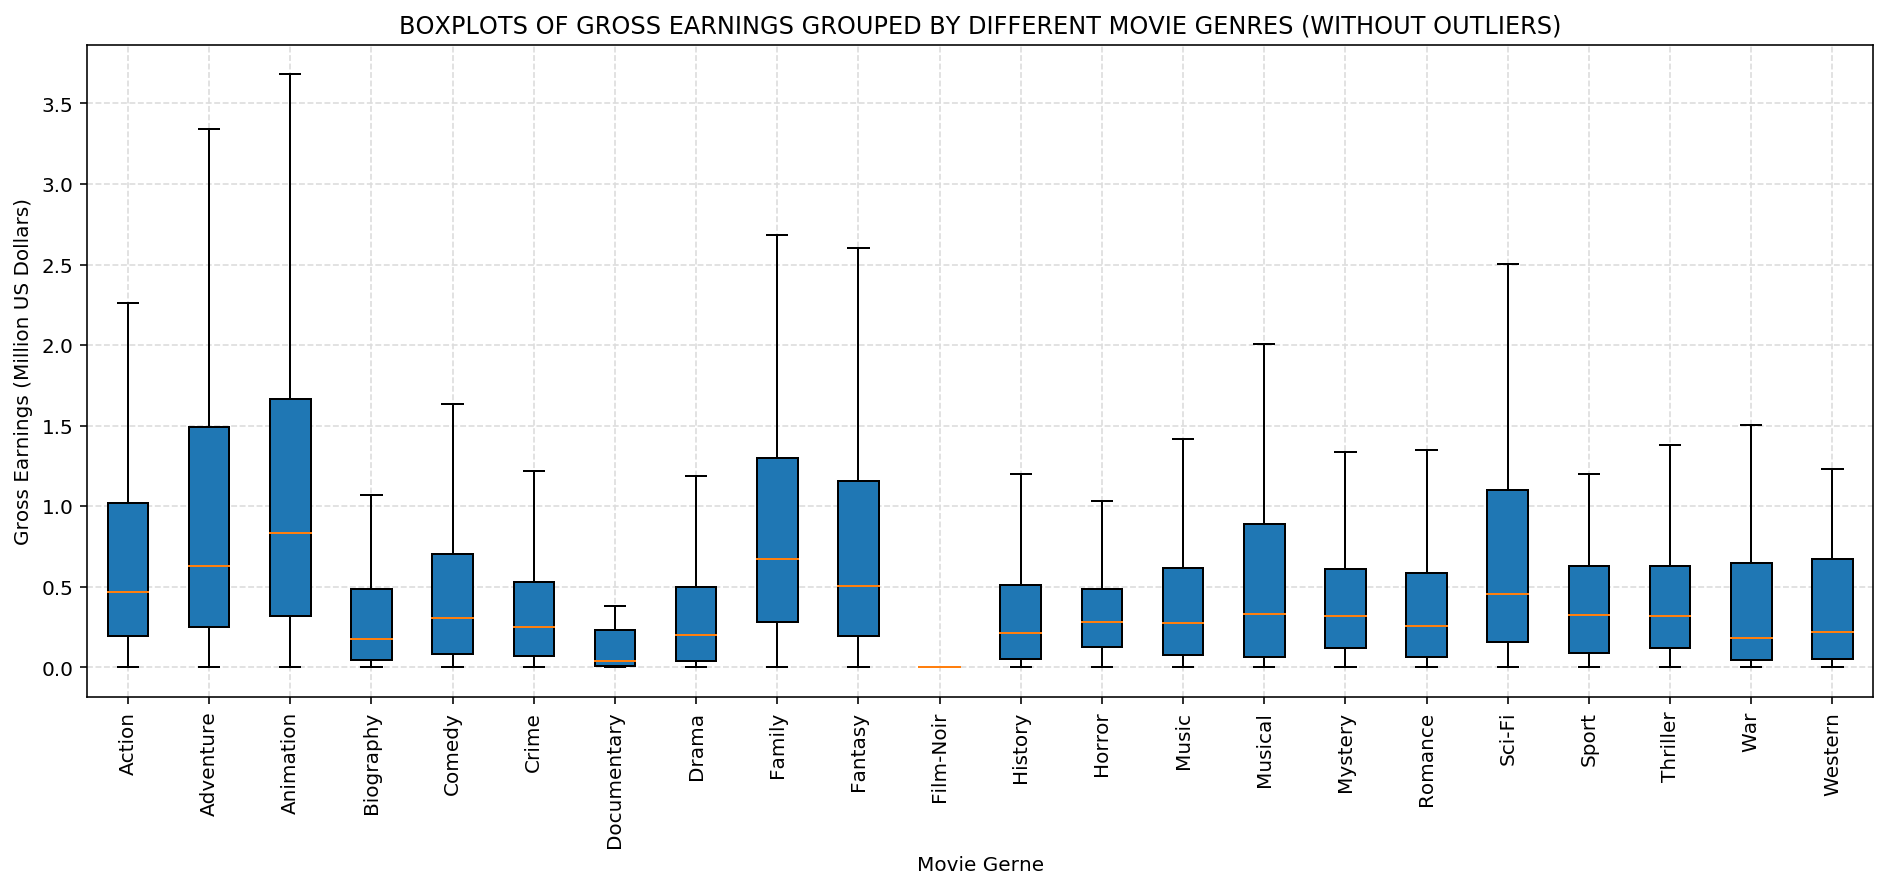

In [60]:
plt.figure(figsize=(16,6))
box = plt.boxplot(gross_of_all_genres, patch_artist = True, showfliers = False)
plt.xticks(np.arange(1,len(genre_set)+1, 1), genre_set, rotation = 90)
plt.xlabel('Movie Gerne')
plt.ylabel('Gross Earnings (Million US Dollars)')
plt.title('BOXPLOTS OF GROSS EARNINGS GROUPED BY DIFFERENT MOVIE GENRES (WITHOUT OUTLIERS)')
plt.grid(color = 'gainsboro', linestyle='dashed')
plt.show();

**Conclusion:** Visually inspecting the distributions of gross earnings by movie genres, Animation movies seem to yield the most earnings with the greatest median value as well as the largest range in comparison with other movie genres. Meanwhile, Documentary and Film-Noir movies have the least gross earnings.

#### 6.1.5. Movie facebook likes grouped by different movie genres

In [61]:
# creating a list of movie facebook likes for each of movie genre, i.e. 'movie_FB_likes_of_all_genres'
movie_FB_likes_of_all_genres = []
for i in genre_set:
    r = df['genres'].str.contains(i)
    movie_FB_likes_for_single_genre = df[r]['movie_facebook_likes']
    movie_FB_likes_of_all_genres.append(movie_FB_likes_for_single_genre)

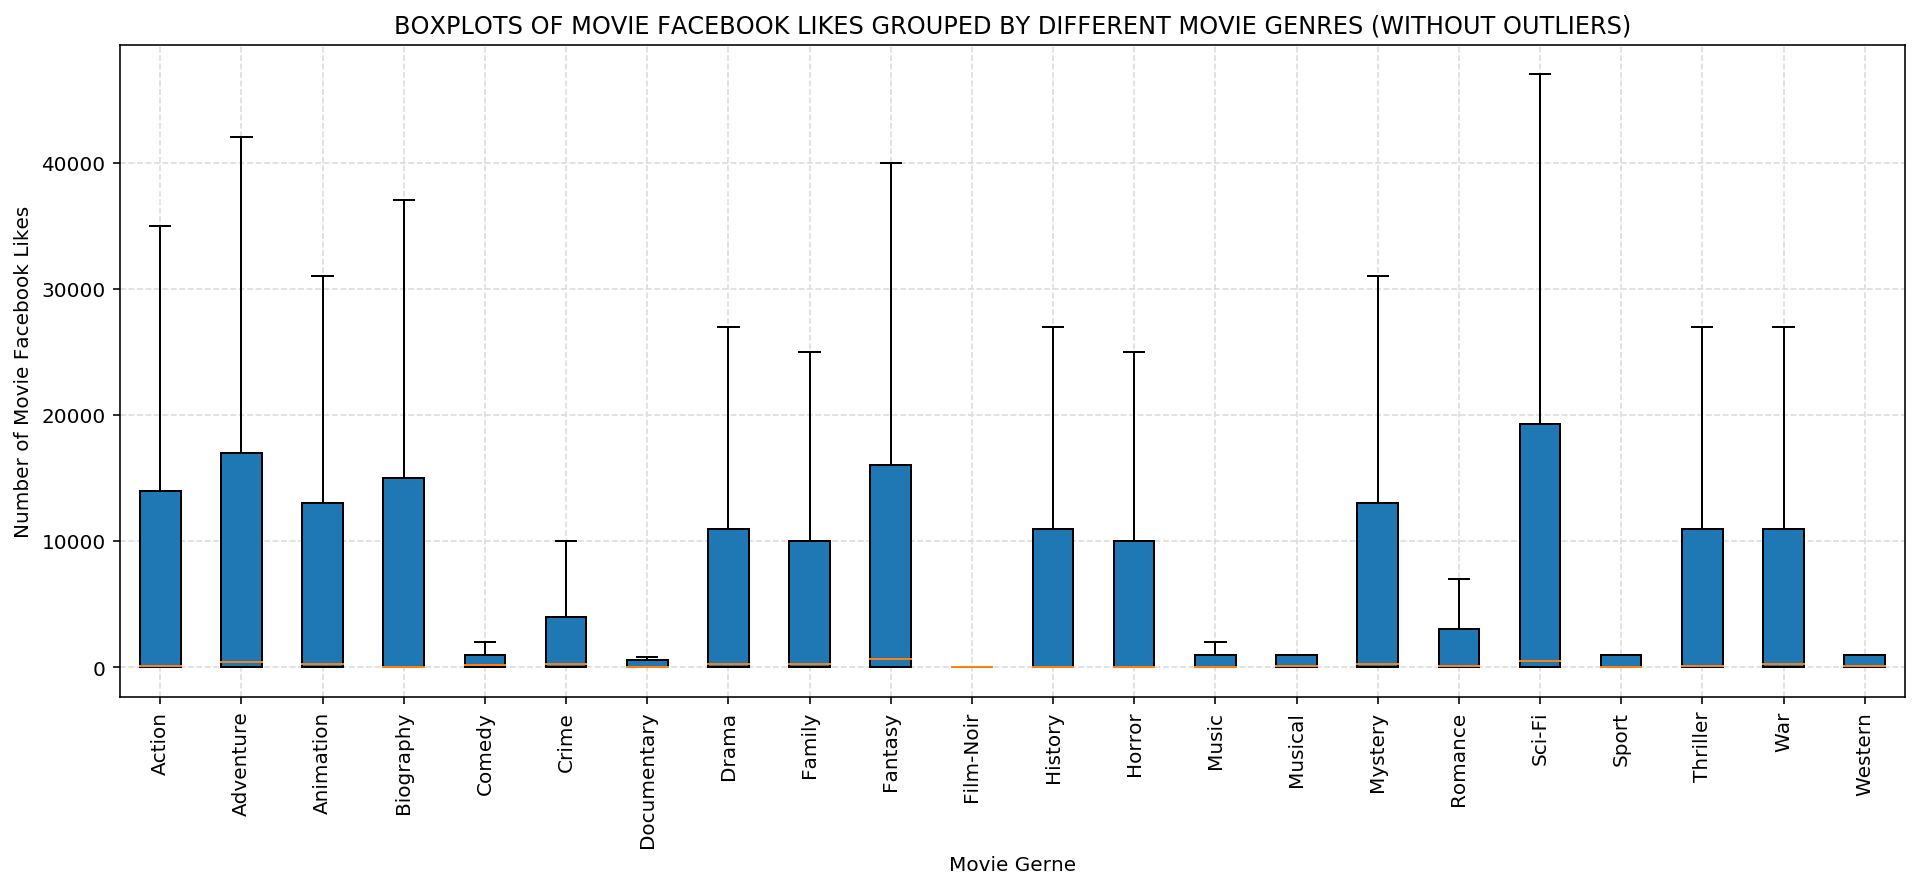

In [62]:
plt.figure(figsize=(16,6))
box = plt.boxplot(movie_FB_likes_of_all_genres, patch_artist = True, showfliers = False)
plt.xticks(np.arange(1,len(genre_set)+1, 1), genre_set, rotation = 90)
plt.xlabel('Movie Gerne')
plt.ylabel('Number of Movie Facebook Likes')
plt.title('BOXPLOTS OF MOVIE FACEBOOK LIKES GROUPED BY DIFFERENT MOVIE GENRES (WITHOUT OUTLIERS)')
plt.grid(color = 'gainsboro', linestyle='dashed')
plt.show();

**Conclusion:** Sci-Fi movies gain the largest range of having Facebook likes. By contrast, Comedy, Documentary, Film-Noir, Music, Musical, Romance, Sport and Western movies have the smallest range of having Facebook likes.

### 6.2. Analysis of a selected movie genre

#### 6.2.1. The selected movie genre

In [63]:
# selecting a genre for analysis
genre = 'Romance'

In [64]:
# creating a pandas Series containing all IMDB scores belonging to the selected genre, i.e. 'genre'
result = df['genres'].str.contains(genre)
imdb_of_selected_genre = df[result]['imdb_score']

#### 6.2.2. Distribution of IMDB scores of the selected movie genre

In [65]:
imdb_of_selected_genre.hist(figsize = (16,6), color = 'slategrey').grid(False)

plt.axvline(x = imdb_of_selected_genre.mean(), color = 'red', linestyle='dashed', linewidth=2)
plt.axvline(x = imdb_of_selected_genre.median(), color = 'limegreen', linestyle='dashed', linewidth=2)


plt.legend(['Mean Score = ' + str(round(imdb_of_selected_genre.mean(), 2)), 
            'Median Score = ' + str(round(imdb_of_selected_genre.median(), 2))],
           loc="upper left",
          prop={"size":13})
plt.title('IMDB SCORE DISTRIBUTION OF ' + genre.upper() + ' MOVIES')
plt.xlabel('IBMD score')
plt.ylabel('Count')
plt.xticks(np.arange(0,10.5, 0.5), rotation = 0)
plt.show();

In [66]:
imdb_of_selected_genre.describe()

count    852.000000
mean       6.434390
std        0.956739
min        2.100000
25%        5.900000
50%        6.500000
75%        7.100000
max        8.500000
Name: imdb_score, dtype: float64

#### 6.2.3. Distribution of IMDB scores of the selected movie genre with other genres

In [67]:
plt.figure(figsize=(16,6))
box = plt.boxplot(imdb_of_all_genres, patch_artist = True)
plt.xticks(np.arange(1,len(genre_set)+1, 1), genre_set, rotation = 90)
plt.yticks(np.arange(1,10.5, 0.5))
plt.xlabel('Movie Gerne')
plt.ylabel('IDBD score')
plt.title('BOXPLOTS OF IMDB SCORES WITH ' + genre.upper()+ ' MOVIES (RED) AND OTHER MOVIE GENRES')
plt.grid(color = 'gainsboro',linestyle='dashed')

colors = ['silver'] * len(genre_set)
colors[genre_set.index(genre)] = 'red'
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show();

#### 6.2.4. Other Comparisons

In [68]:
# number of movies 
temp = dict()
for i in genre_set:
    r = df['genres'].str.contains(i)
    temp[i] = df[r].count()[0]
k = pd.Series(temp)
print('Number of ' + genre + ' movies between 1927 and 2016: ' + str(k[genre]) + ' movies')

Number of Romance movies between 1927 and 2016: 852 movies


In [69]:
plot4 = k.plot.bar(rot=90, title='BARPLOT OF NUMBER OF MOVIES FOR EACH MOVIE GENRE - ' + genre.upper() + ' (RED)', 
                   figsize = (16, 6), color = colors)
plot4.set_xlabel("Movie Genre")
plot4.set_ylabel("Number of Movies")
plot4.grid(linestyle='dashed', linewidth='0.5', color='grey')
plot4.set_axisbelow(True);

In [70]:
print("\nDescriptive Statistics of the " + genre + " movies' gross earnings:\n")
print(gross_of_all_genres[genre_set.index(genre)].describe().drop('count').to_string())


Descriptive Statistics of the Romance movies' gross earnings:

mean    0.454197
std     0.610540
min     0.000030
25%     0.065922
50%     0.257269
75%     0.587041
max     6.586723


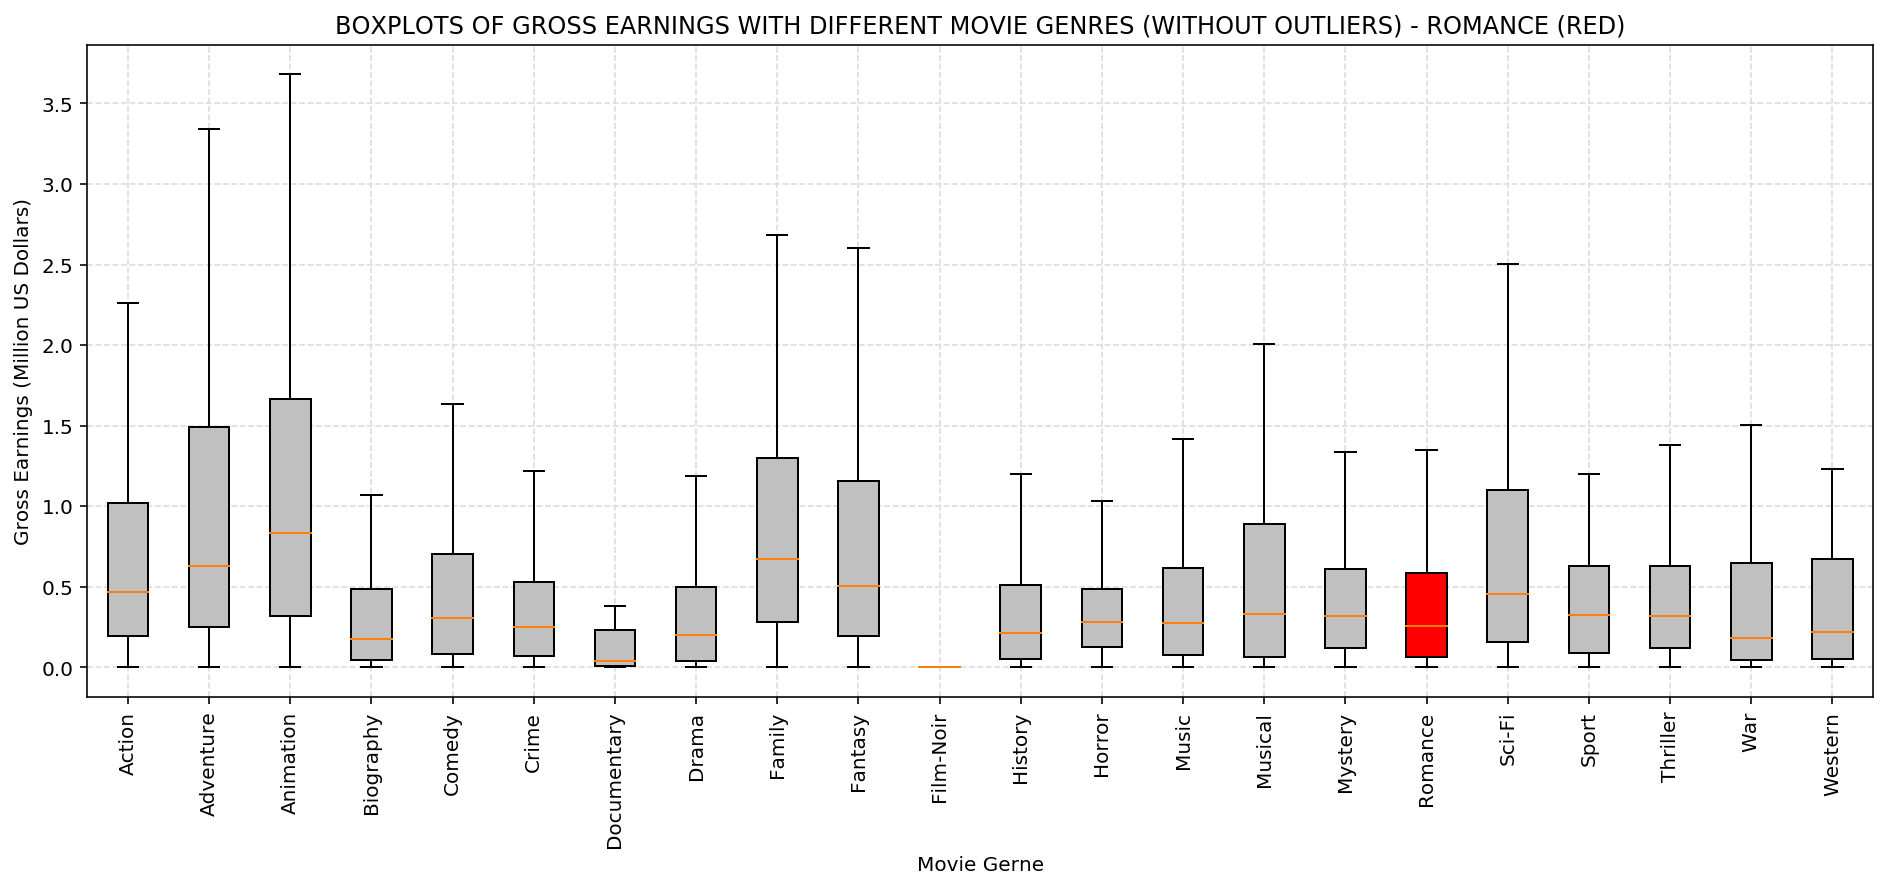

In [71]:
plt.figure(figsize=(16,6))
box = plt.boxplot(gross_of_all_genres, patch_artist = True, showfliers = False)
plt.xticks(np.arange(1,len(genre_set)+1, 1), genre_set, rotation = 90)
#plt.yticks(np.arange(1,10.5, 0.5))
plt.xlabel('Movie Gerne')
plt.ylabel('Gross Earnings (Million US Dollars)')
plt.title('BOXPLOTS OF GROSS EARNINGS WITH DIFFERENT MOVIE GENRES (WITHOUT OUTLIERS) - ' + genre.upper() + ' (RED)')
plt.grid(color = 'gainsboro', linestyle='dashed')
colors = ['silver'] * len(genre_set)
colors[genre_set.index(genre)] = 'red'
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show(); 

In [72]:
print("\nDescriptive Statistics of the " + genre + " movies' Facebook likes:\n")
print(movie_FB_likes_of_all_genres[genre_set.index(genre)].describe().drop('count').to_string())


Descriptive Statistics of the Romance movies' Facebook likes:

mean      7063.075117
std      17933.291787
min          0.000000
25%          0.000000
50%        131.500000
75%       3000.000000
max     148000.000000


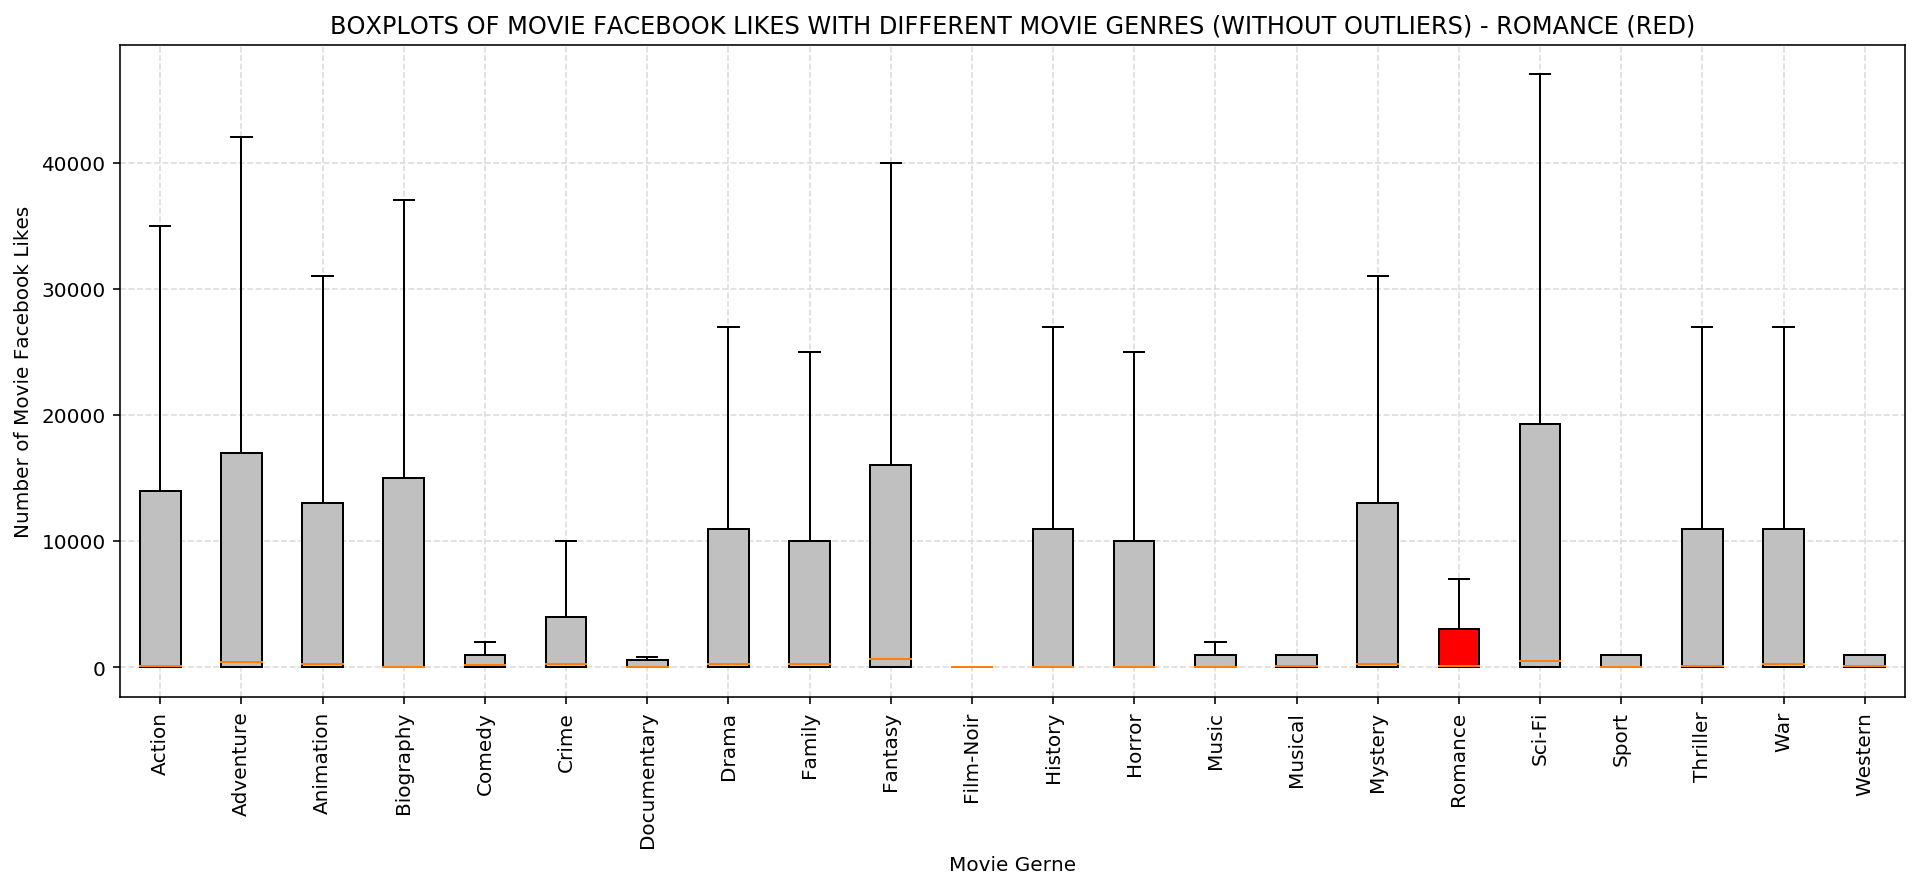

In [73]:
plt.figure(figsize=(16,6))
box = plt.boxplot(movie_FB_likes_of_all_genres, patch_artist = True, showfliers = False)
plt.xticks(np.arange(1,len(genre_set)+1, 1), genre_set, rotation = 90)
plt.xlabel('Movie Gerne')
plt.ylabel('Number of Movie Facebook Likes')
plt.title('BOXPLOTS OF MOVIE FACEBOOK LIKES WITH DIFFERENT MOVIE GENRES (WITHOUT OUTLIERS) - ' + genre.upper() + ' (RED)')
plt.grid(color = 'gainsboro', linestyle='dashed')

colors = ['silver'] * len(genre_set)
colors[genre_set.index(genre)] = 'red'
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show();

## 7. IMDB SCORES vs OTHER VARIABLES
### 7.1. Relationship between the IMDB Scores with other variables

In [74]:
temp = df[['duration', 
           'director_facebook_likes',
           'num_user_for_reviews',
           'num_critic_for_reviews',
           'num_voted_users',
           'cast_total_facebook_likes',
           'movie_facebook_likes',
           'facenumber_in_poster',
           'title_year',
           'aspect_ratio',
           'gross',
           'budget',
           'imdb_score']]

In [75]:
sns.set(style="ticks")
ax = sns.pairplot(temp)
plt.show();

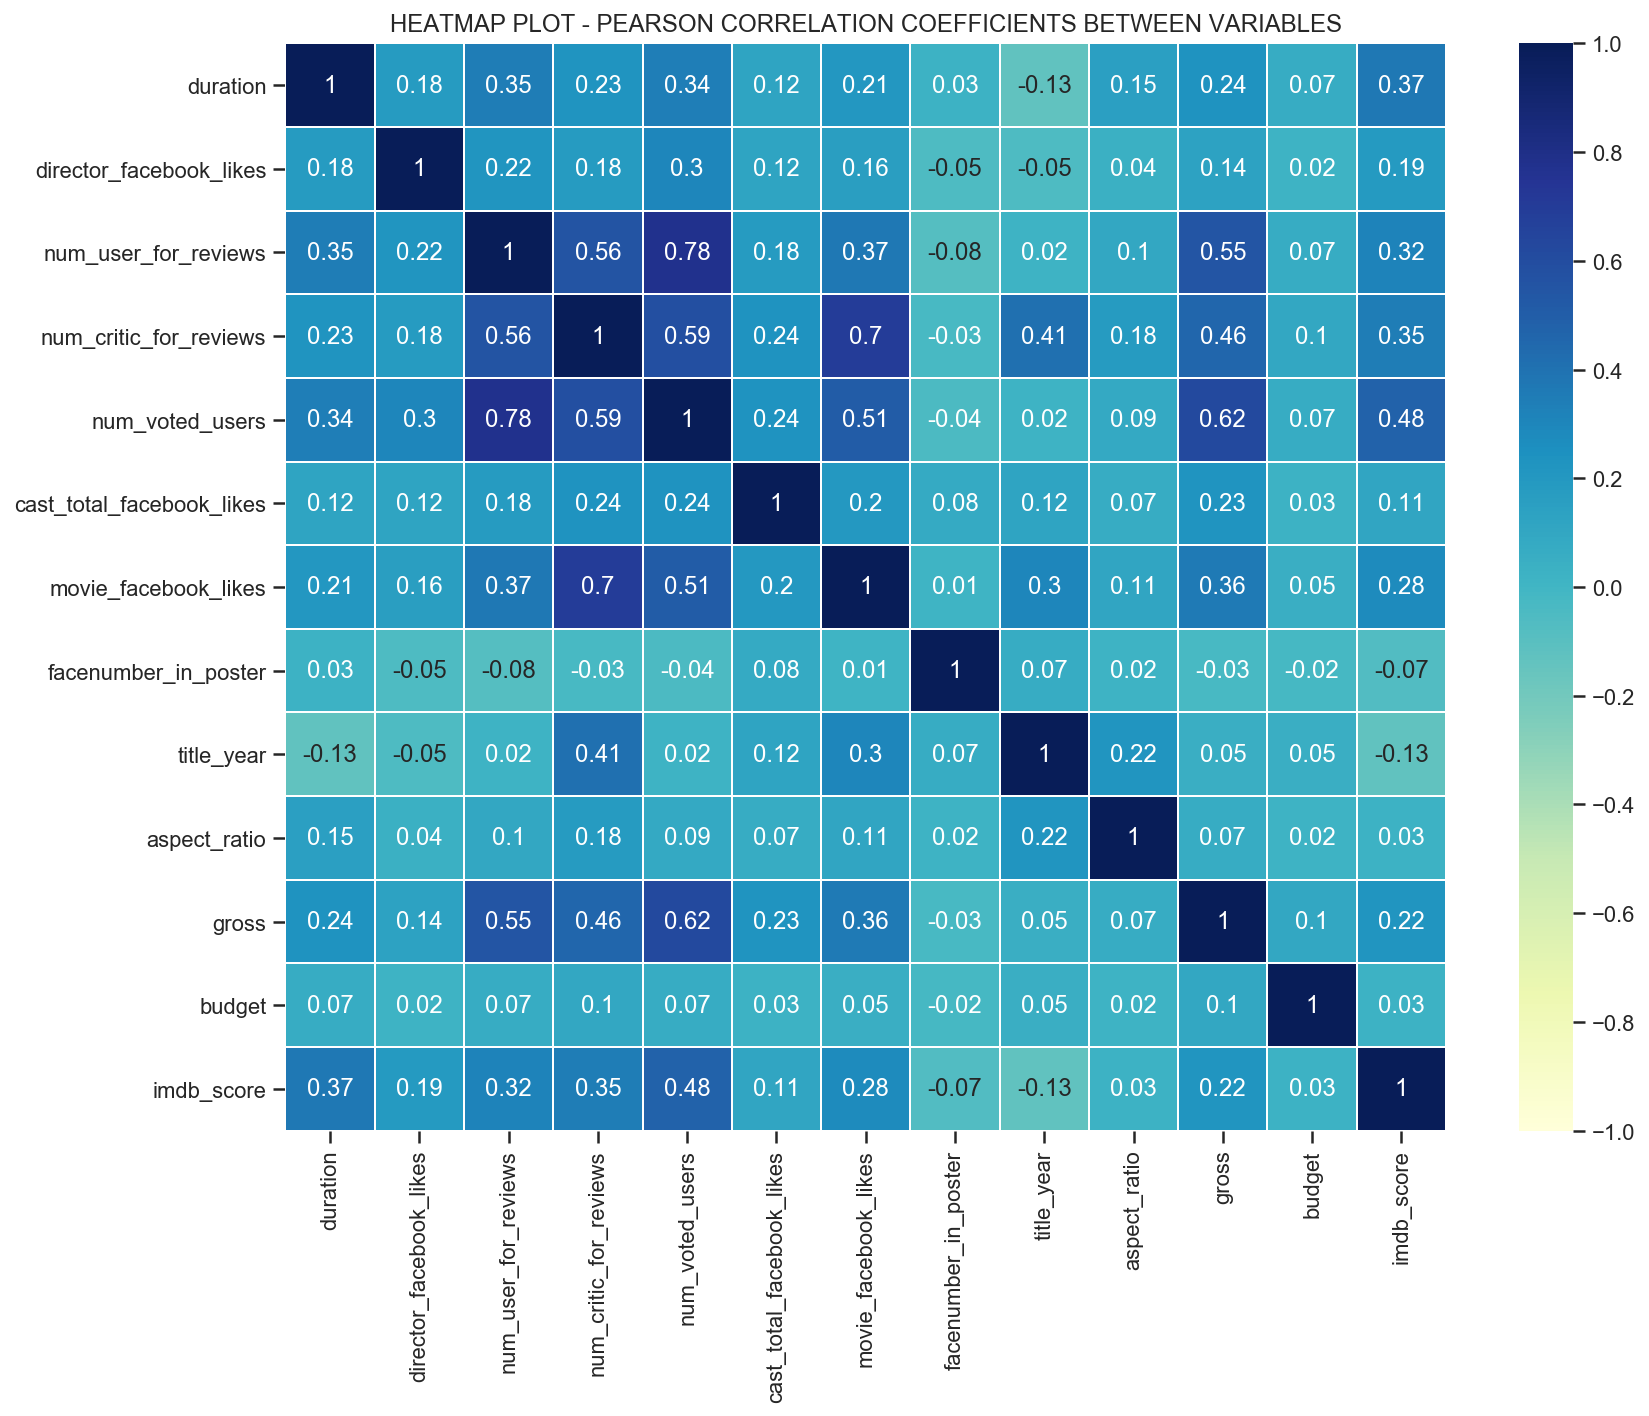

In [76]:
ax = sns.heatmap(round(temp.corr(),2),
                 cmap="YlGnBu", 
                 cbar_kws={'ticks': [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0]}, 
                 vmin=-1, 
                 vmax=1,
                 linewidths=.5,
                 annot=True)
ax.set_title('HEATMAP PLOT - PEARSON CORRELATION COEFFICIENTS BETWEEN VARIABLES')
ax.figure.set_size_inches(13,10)
plt.show();

In [77]:
temp['imdb_score'].describe()

count    3737.000000
mean        6.464249
std         1.054724
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

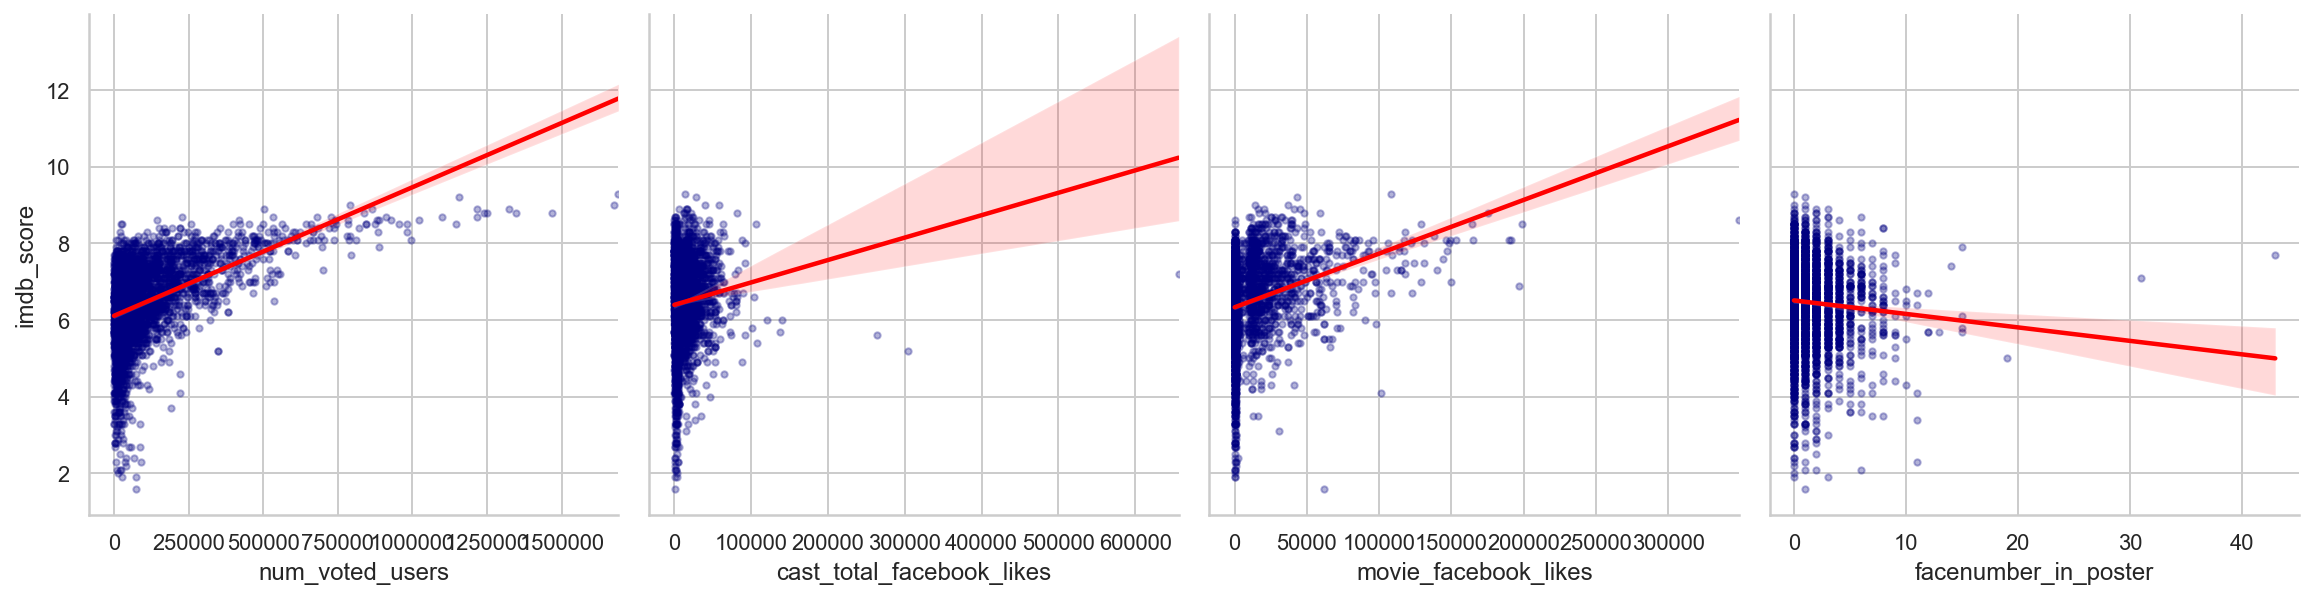

In [78]:
sns.set_style("whitegrid")
sns.pairplot(temp, 
             x_vars=["duration", "director_facebook_likes", "num_user_for_reviews", "num_critic_for_reviews"],
             y_vars=["imdb_score"], 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{"s": 10, 'alpha':0.3, 'color': 'navy'}},
             height=4, aspect=1, kind="reg")
plt.suptitle('PAIRPLOTS OF IMDB SCORES WITH OTHER VARIABLES', size = 20)
sns.pairplot(temp, 
             x_vars=["num_voted_users", "cast_total_facebook_likes", "movie_facebook_likes", "facenumber_in_poster"],
             y_vars=["imdb_score"],
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{"s": 10, 'alpha':0.3, 'color': 'navy'}},
             height=4, aspect=1, kind="reg");
sns.pairplot(temp, 
             x_vars=["title_year", "aspect_ratio", "gross", "budget"],
             y_vars=["imdb_score"],
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{"s": 10, 'alpha':0.3, 'color': 'navy'}},
             height=4, aspect=1, kind="reg");

In [79]:
temp['gross'].describe()

count    3.737000e+03
mean     5.229061e+07
std      6.974153e+07
min      1.620000e+02
25%      8.047690e+06
50%      2.995944e+07
75%      6.673499e+07
max      7.605058e+08
Name: gross, dtype: float64

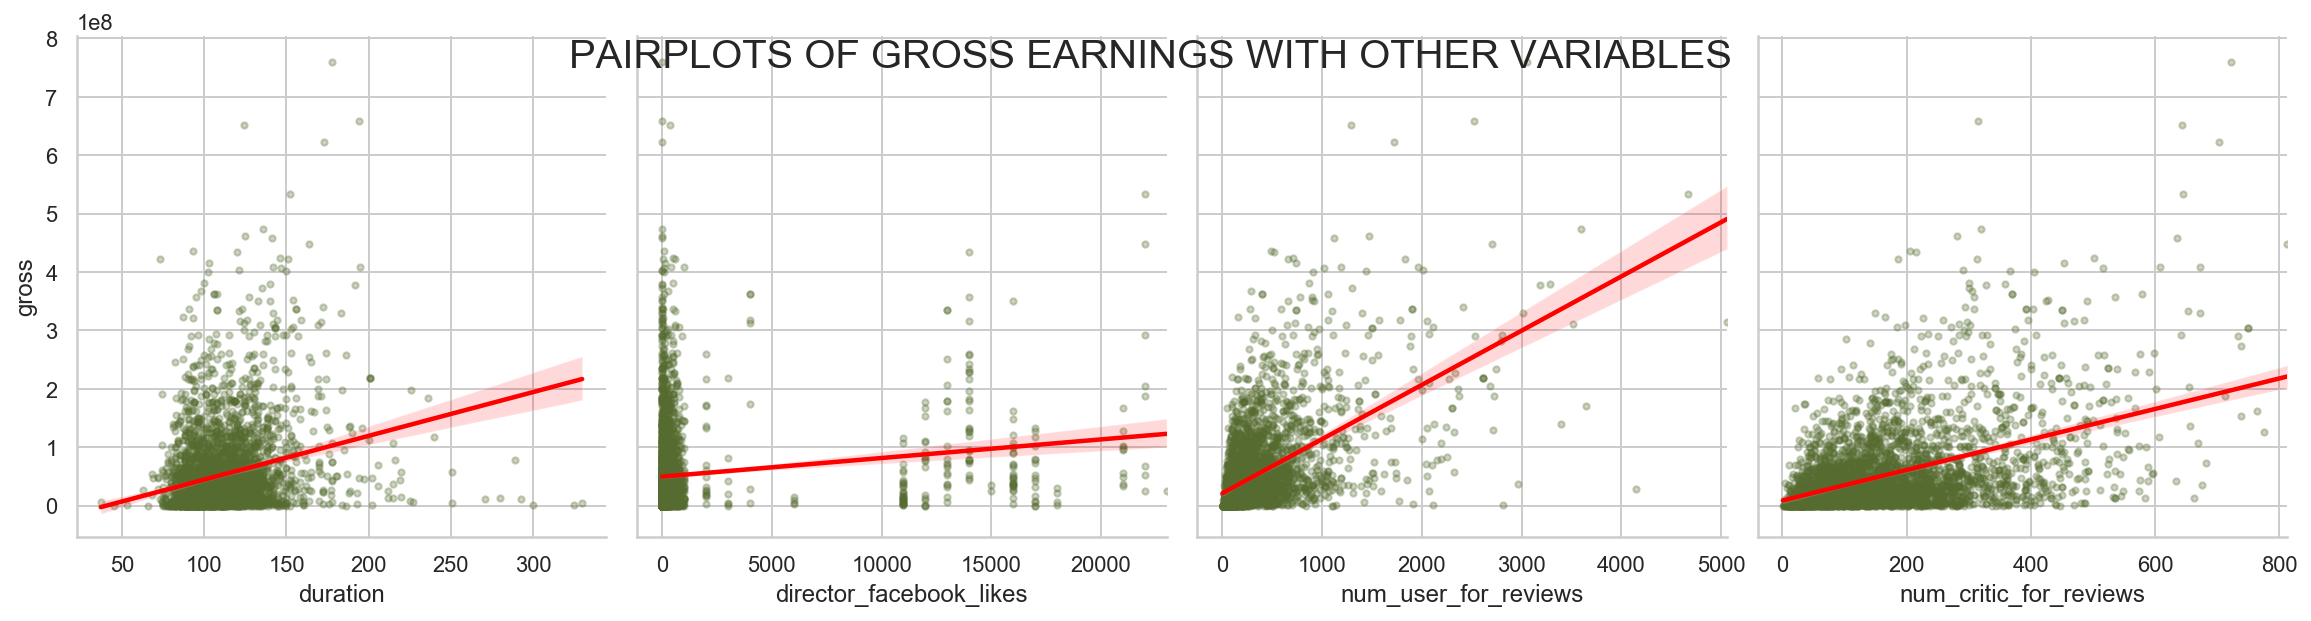

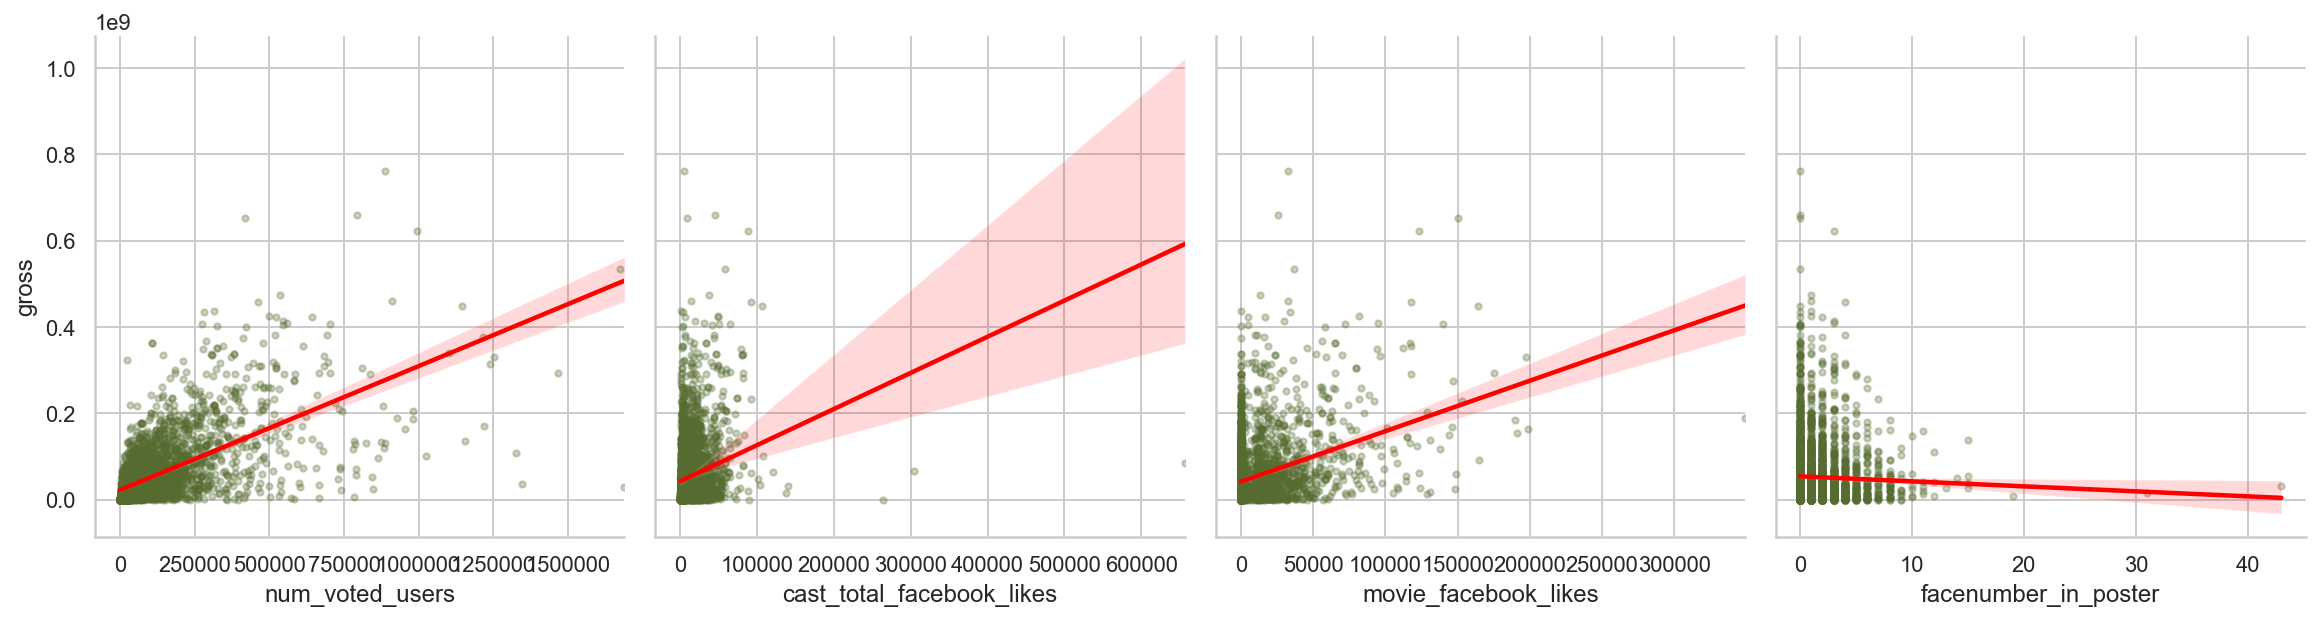

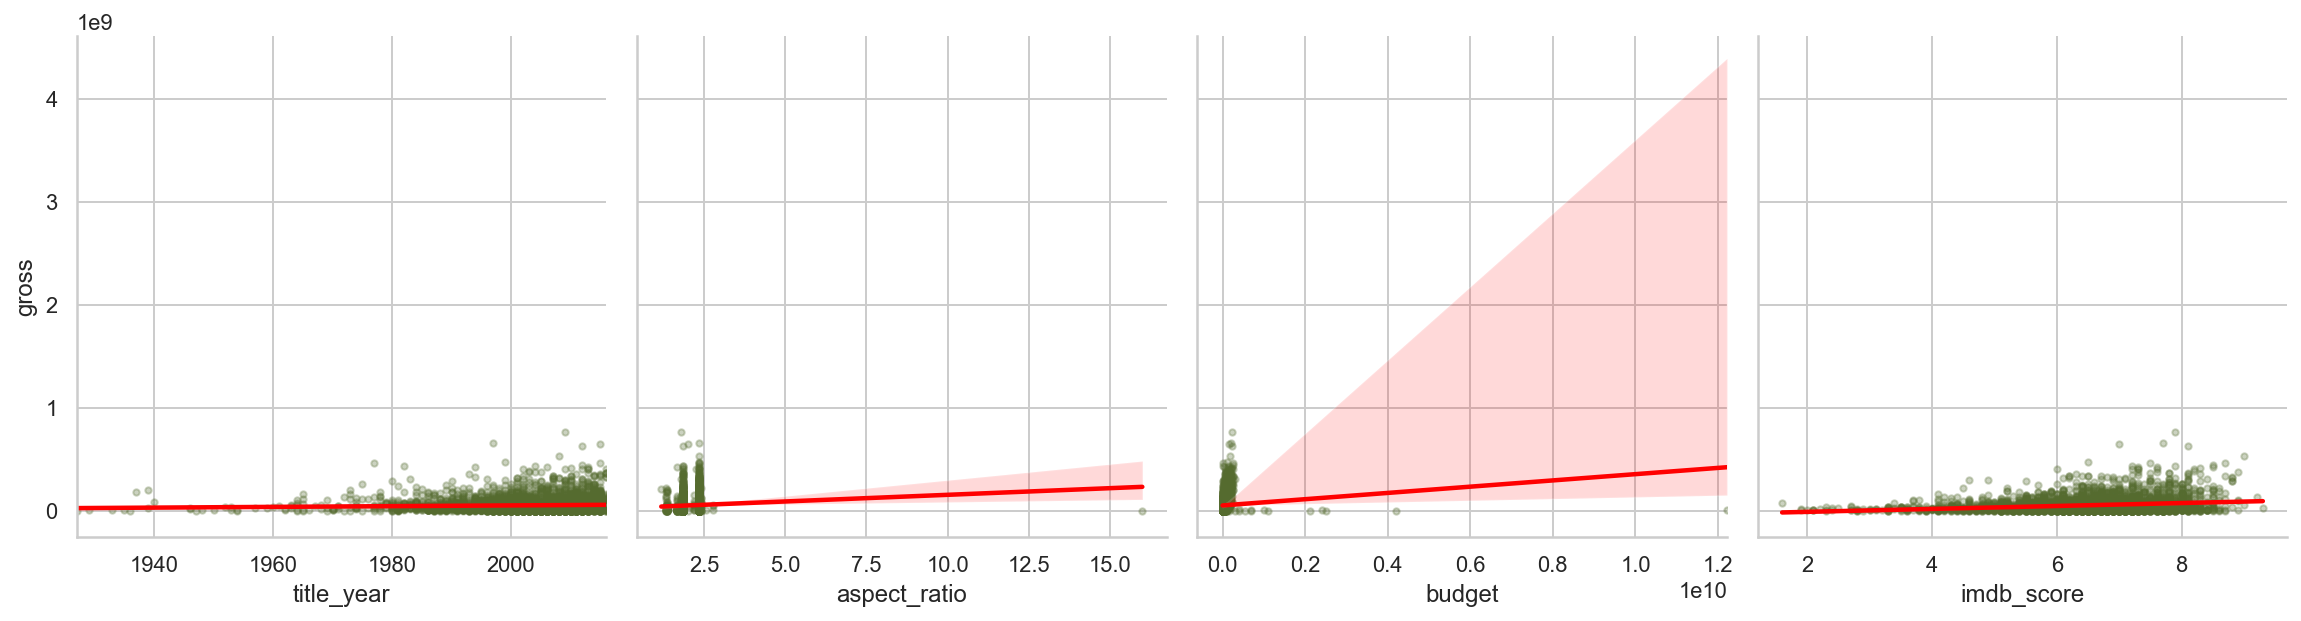

In [80]:
sns.set_style("whitegrid")
sns.pairplot(temp, 
             x_vars=["duration", "director_facebook_likes", "num_user_for_reviews", "num_critic_for_reviews"],
             y_vars=["gross"], 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{"s": 10, 'alpha':0.3, 'color': 'darkolivegreen'}},
             height=4, aspect=1, kind="reg")
plt.suptitle('PAIRPLOTS OF GROSS EARNINGS WITH OTHER VARIABLES', size = 20)
sns.pairplot(temp, 
             x_vars=["num_voted_users", "cast_total_facebook_likes", "movie_facebook_likes", "facenumber_in_poster"],
             y_vars=["gross"],
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{"s": 10, 'alpha':0.3, 'color': 'darkolivegreen'}},
             height=4, aspect=1, kind="reg");
sns.pairplot(temp, 
             x_vars=["title_year", "aspect_ratio", "budget", "imdb_score"],
             y_vars=["gross"],
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{"s": 10, 'alpha':0.3, 'color': 'darkolivegreen'}},
             height=4, aspect=1, kind="reg");